In [3]:
%matplotlib inline

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import scipy.io.wavfile
from scipy.fftpack import fft, fftfreq
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from scipy import stats
import warnings
import hashlib
import random
import string
import time
import pandas as pd
from collections import defaultdict
import os
from scipy.signal import butter, lfilter
from ipywidgets import interact, FloatSlider

# Write your imports here

# Probability and Combinatorics Exercise
## Probabilistic Events. Combinatorics and Counting. Distributions

### Problem 1. Exploring Distribution Parameters
A good idea to visualize and explore the parameters of various distributions is just to plot them.

We can do this in either one of two ways:
1. Draw (generate) many random variables which follow that distribution. Plot their histogram
2. Write the distribution function directly and plot it

Either of these will work but the second approach will give us better looking results. [`scipy.stats`](https://docs.scipy.org/doc/scipy-0.19.1/reference/stats.html) has a lot of built-in distributions that we can use. Each of them has its own use cases.

It's very important that we plot discrete and continuous distributions in different ways. **We must not make discrete distributions look continuous**. That is, discrete distributions are only defined for integer number of trials: $n \in \mathbb{N}$.

Let's plot the binomial and Gaussian distributions.

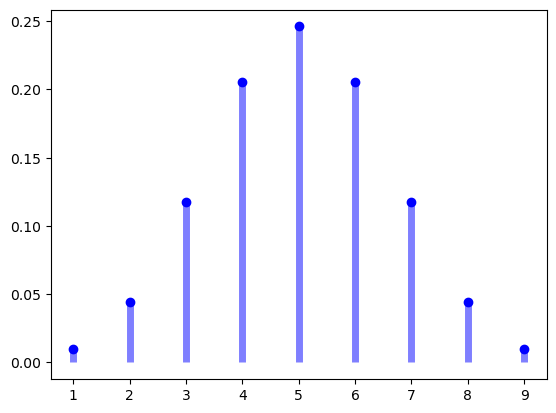

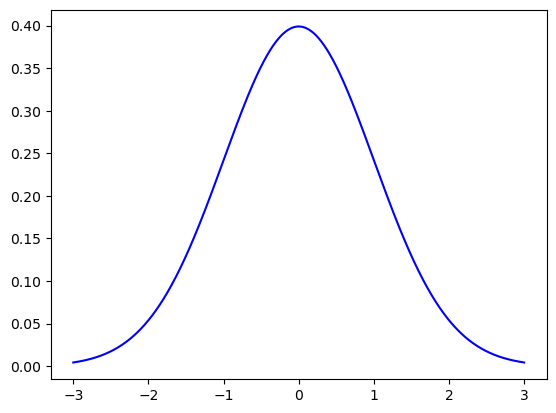

In [4]:
def plot_binomial_distribution(x, n, p):
    """
    Plots the binomial distribution with parameters n and p. The parameter x specifies the values
    where the function is evaluated at
    """
    binomial = scipy.stats.binom.pmf(x, n, p)
    plt.scatter(x, binomial, color = "blue")
    plt.vlines(x, 0, binomial, color = "blue", linewidth = 5, alpha = 0.5)
    plt.show()
    
def plot_gaussian_distribution(mu, sigma, x):
    """
    Plots the Gaussian distribution with parameters mu and sigma. The parameter x specifies 
    the values where the function is evaluated at
    """
    gaussian = scipy.stats.norm.pdf(x, loc = mu, scale = sigma)
    plt.plot(x, gaussian, color = "blue")
    plt.show()
    
x_binomial = np.arange(1, 10)
plot_binomial_distribution(x_binomial, 10, 0.5)

x_gaussian = np.linspace(-3, 3, 1000)
plot_gaussian_distribution(0, 1, x_gaussian)

These look similar. That's with a good reason: the Gaussian distribution is a generalization of the binomial distribution as $n \rightarrow \infty$.

What do these parameters specify exactly? Let's find out. 

Take the binomial distribution. Keep $p = 0.5$ and change $n$. Plot several values of $n$ in the same plot, with different colors. **What values to choose?** Remember that $n$ was the number of experiments, so it should be an integer $\ge 1$.

Now keep $n$ at some reasonable value (a number between 10 and 30 should be good) and change $p$. $p$ is a probability so its values must be between 0 and 1.

What can you conclude? How does the function shape change? When is it symmetrical and when it is not?

Perform the same kind of operations on $\mu$ and $\sigma$ with the Gaussian distribution. What do these parameters represent?

If you get stuck, try to find what the distribution functions should look like on the Internet.

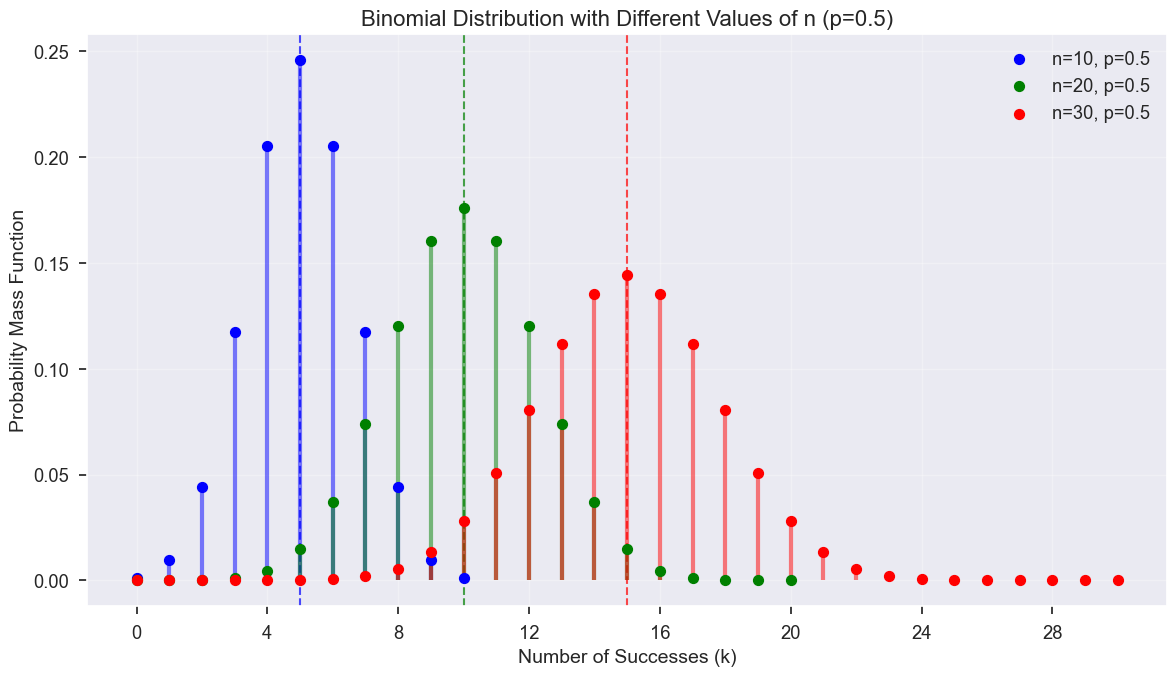

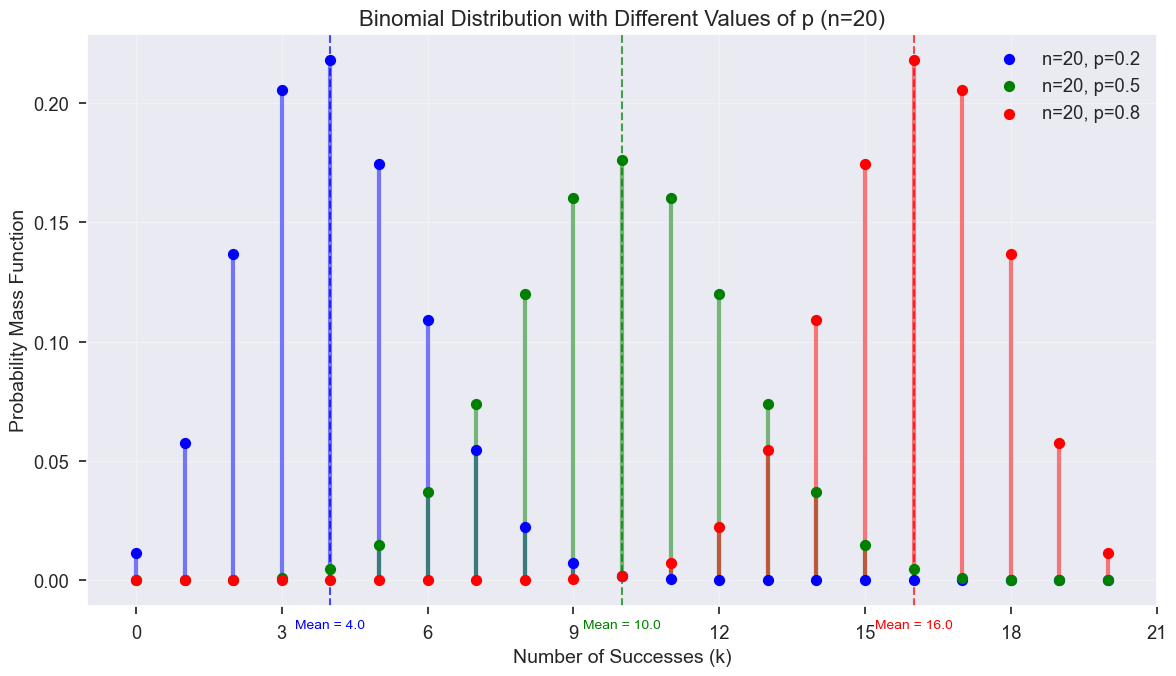

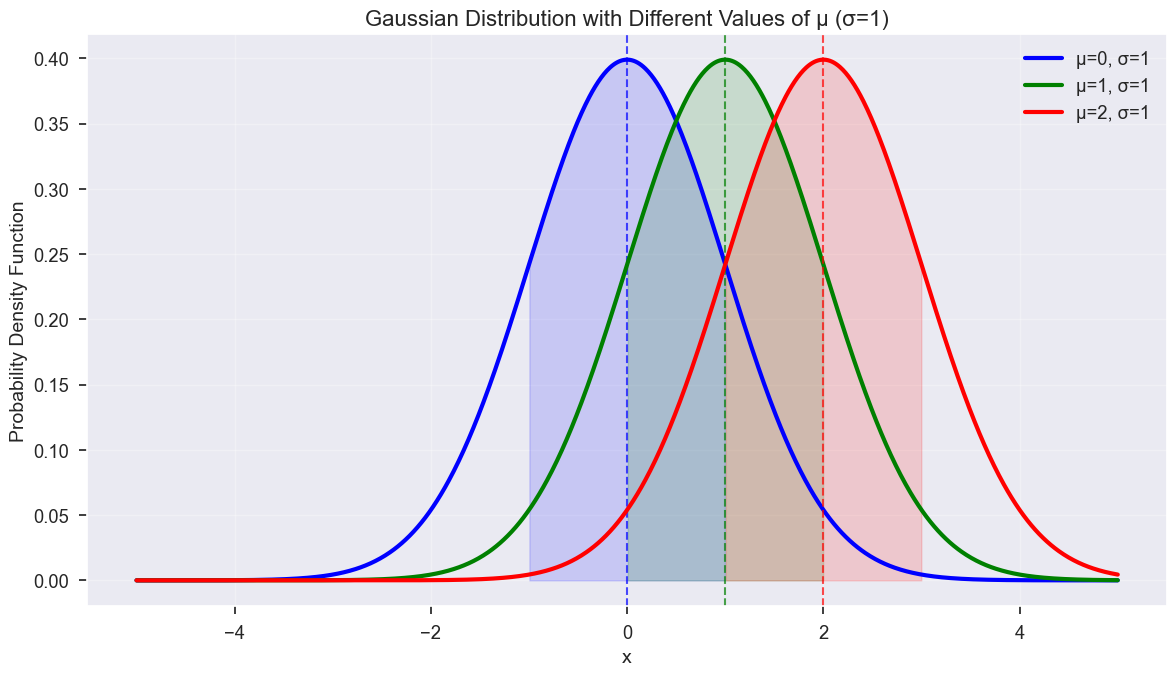

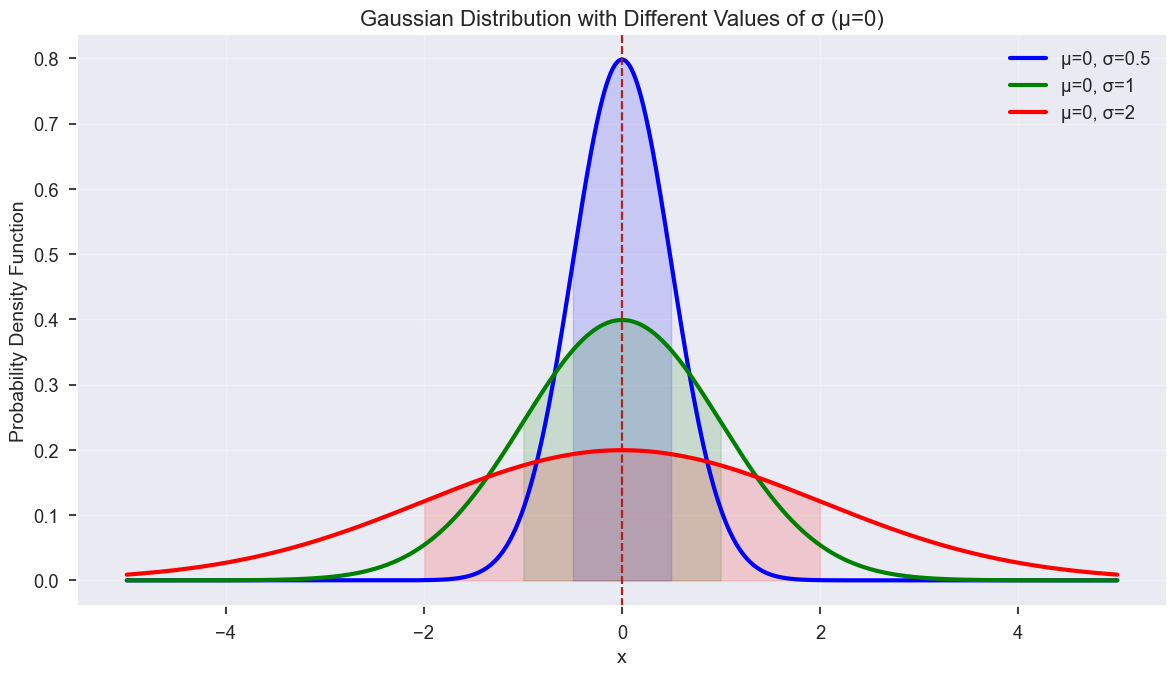

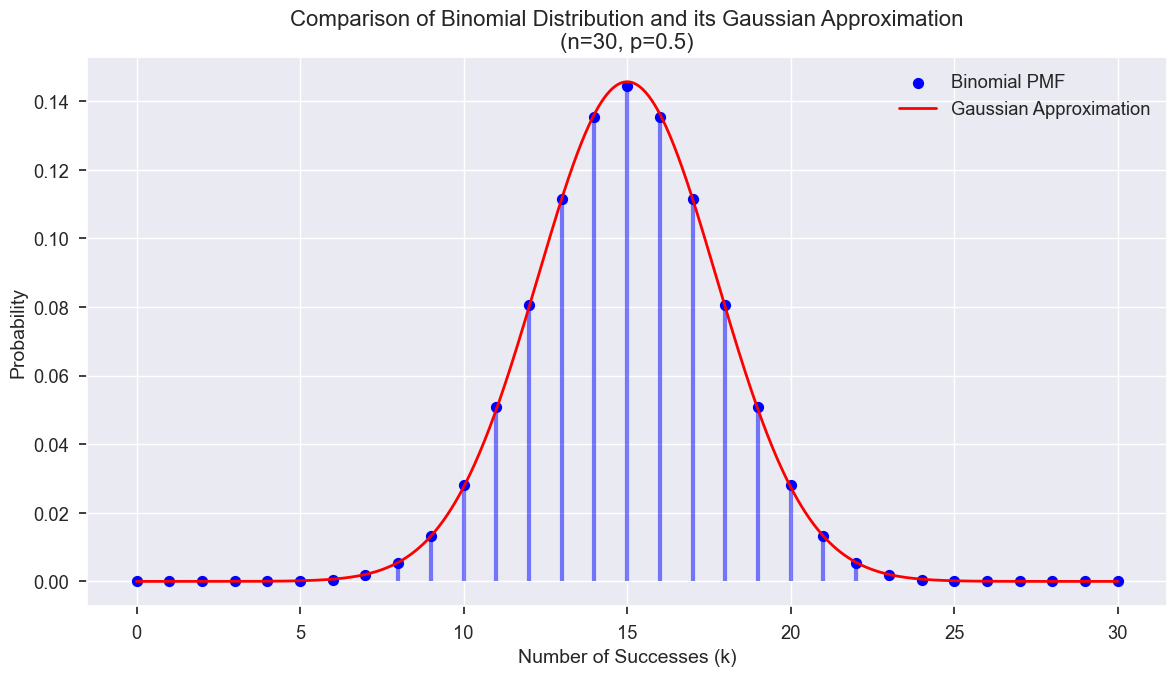

Observations about Binomial Distribution:
1. Effect of parameter n (number of trials):
   - As n increases, the distribution becomes wider and more bell-shaped
   - The peak of the distribution is centered at n/2 when p = 0.5
   - Larger values of n make the distribution more closely resemble a Gaussian

2. Effect of parameter p (probability of success):
   - When p = 0.5, the distribution is symmetric around n/2
   - When p < 0.5, the distribution is skewed to the right (positive skew)
   - When p > 0.5, the distribution is skewed to the left (negative skew)
   - The peak of the distribution is at or near n·p (the expected value)
   - The distribution is only symmetrical when p = 0.5

Observations about Gaussian Distribution:
1. Effect of parameter μ (mu):
   - μ determines the center/location of the distribution
   - Changing μ shifts the entire distribution left or right without changing its shape
   - μ represents the mean, median, and mode of the distribution

2. Effect of paramet

In [7]:

# Set the style for better-looking plots
plt.style.use('seaborn-v0_8')
sns.set_context("notebook", font_scale=1.2)

# Define plotting functions for discrete and continuous distributions
def plot_binomial_distribution(x, n, p, ax=None, color='blue', label=None):
    """
    Plots the binomial distribution with parameters n and p.
    The parameter x specifies the values where the function is evaluated.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))
    
    binomial = scipy.stats.binom.pmf(x, n, p)
    ax.scatter(x, binomial, color=color, s=50, zorder=3, label=label)
    ax.vlines(x, 0, binomial, color=color, linewidth=3, alpha=0.5, zorder=2)
    ax.grid(True, alpha=0.3, zorder=1)
    
    # Set the x-axis to display integers only
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    
    # Calculate and mark the mean (n*p)
    mean = n * p
    ax.axvline(mean, color=color, linestyle='--', alpha=0.7, zorder=1)
    
    return ax

def plot_gaussian_distribution(mu, sigma, x, ax=None, color='blue', label=None):
    """
    Plots the Gaussian distribution with parameters mu and sigma.
    The parameter x specifies the values where the function is evaluated.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))
    
    gaussian = scipy.stats.norm.pdf(x, loc=mu, scale=sigma)
    ax.plot(x, gaussian, color=color, linewidth=3, label=label)
    
    # Add vertical line at the mean
    ax.axvline(mu, color=color, linestyle='--', alpha=0.7)
    
    # Shade the area within ±1 sigma
    ax.fill_between(x, gaussian, where=((x >= mu-sigma) & (x <= mu+sigma)), 
                   color=color, alpha=0.15)
    
    ax.grid(True, alpha=0.3)
    return ax

# Part 1: Exploring Binomial Distribution with varying n
plt.figure(figsize=(12, 7))
ax1 = plt.subplot(111)

n_values = [10, 20, 30]
p = 0.5
colors = ['blue', 'green', 'red']

max_n = max(n_values)
x_binomial = np.arange(0, max_n + 1)

for i, n in enumerate(n_values):
    plot_binomial_distribution(x_binomial[:n+1], n, p, ax=ax1, color=colors[i], label=f'n={n}, p={p}')

ax1.set_title('Binomial Distribution with Different Values of n (p=0.5)', fontsize=16)
ax1.set_xlabel('Number of Successes (k)', fontsize=14)
ax1.set_ylabel('Probability Mass Function', fontsize=14)
ax1.legend()
plt.tight_layout()
plt.show()

# Part 2: Exploring Binomial Distribution with varying p
plt.figure(figsize=(12, 7))
ax2 = plt.subplot(111)

n = 20
p_values = [0.2, 0.5, 0.8]
colors = ['blue', 'green', 'red']

x_binomial = np.arange(0, n + 1)

for i, p in enumerate(p_values):
    plot_binomial_distribution(x_binomial, n, p, ax=ax2, color=colors[i], label=f'n={n}, p={p}')
    
    # Annotate mean (n*p)
    mean = n * p
    ax2.annotate(f'Mean = {mean}', 
                xy=(mean, 0), 
                xytext=(mean, -0.02),
                fontsize=10,
                ha='center', 
                color=colors[i])

ax2.set_title(f'Binomial Distribution with Different Values of p (n={n})', fontsize=16)
ax2.set_xlabel('Number of Successes (k)', fontsize=14)
ax2.set_ylabel('Probability Mass Function', fontsize=14)
ax2.legend()
plt.tight_layout()
plt.show()

# Part 3: Exploring Gaussian Distribution with varying mu
plt.figure(figsize=(12, 7))
ax3 = plt.subplot(111)

mu_values = [0, 1, 2]
sigma = 1
colors = ['blue', 'green', 'red']

x_gaussian = np.linspace(-5, 5, 1000)

for i, mu in enumerate(mu_values):
    plot_gaussian_distribution(mu, sigma, x_gaussian, ax=ax3, color=colors[i], label=f'μ={mu}, σ={sigma}')

ax3.set_title('Gaussian Distribution with Different Values of μ (σ=1)', fontsize=16)
ax3.set_xlabel('x', fontsize=14)
ax3.set_ylabel('Probability Density Function', fontsize=14)
ax3.legend()
plt.tight_layout()
plt.show()

# Part 4: Exploring Gaussian Distribution with varying sigma
plt.figure(figsize=(12, 7))
ax4 = plt.subplot(111)

mu = 0
sigma_values = [0.5, 1, 2]
colors = ['blue', 'green', 'red']

x_gaussian = np.linspace(-5, 5, 1000)

for i, sigma in enumerate(sigma_values):
    plot_gaussian_distribution(mu, sigma, x_gaussian, ax=ax4, color=colors[i], label=f'μ={mu}, σ={sigma}')

ax4.set_title('Gaussian Distribution with Different Values of σ (μ=0)', fontsize=16)
ax4.set_xlabel('x', fontsize=14)
ax4.set_ylabel('Probability Density Function', fontsize=14)
ax4.legend()
plt.tight_layout()
plt.show()

# Part 5: Comparing Binomial to Gaussian Approximation
plt.figure(figsize=(12, 7))
ax5 = plt.subplot(111)

n = 30
p = 0.5

# Calculate the parameters for the normal approximation
mu = n * p
sigma = np.sqrt(n * p * (1-p))

# Binomial distribution
x_binomial = np.arange(0, n + 1)
binomial_pmf = scipy.stats.binom.pmf(x_binomial, n, p)

# Create a finer x scale for the Gaussian
x_gaussian = np.linspace(0, n, 1000)
gaussian_pdf = scipy.stats.norm.pdf(x_gaussian, loc=mu, scale=sigma)

# Scaling factor for the normal approximation (since binomial is discrete and normal is continuous)
scaling_factor = 1

# Plot both distributions
ax5.scatter(x_binomial, binomial_pmf, color='blue', s=50, label='Binomial PMF')
ax5.vlines(x_binomial, 0, binomial_pmf, color='blue', linewidth=3, alpha=0.5)
ax5.plot(x_gaussian, gaussian_pdf * scaling_factor, 'r-', linewidth=2, label='Gaussian Approximation')

ax5.set_title(f'Comparison of Binomial Distribution and its Gaussian Approximation\n(n={n}, p={p})', fontsize=16)
ax5.set_xlabel('Number of Successes (k)', fontsize=14)
ax5.set_ylabel('Probability', fontsize=14)
ax5.legend()
plt.tight_layout()
plt.show()

# Write observations about the distributions
print("Observations about Binomial Distribution:")
print("1. Effect of parameter n (number of trials):")
print("   - As n increases, the distribution becomes wider and more bell-shaped")
print("   - The peak of the distribution is centered at n/2 when p = 0.5")
print("   - Larger values of n make the distribution more closely resemble a Gaussian")
print("\n2. Effect of parameter p (probability of success):")
print("   - When p = 0.5, the distribution is symmetric around n/2")
print("   - When p < 0.5, the distribution is skewed to the right (positive skew)")
print("   - When p > 0.5, the distribution is skewed to the left (negative skew)")
print("   - The peak of the distribution is at or near n·p (the expected value)")
print("   - The distribution is only symmetrical when p = 0.5")

print("\nObservations about Gaussian Distribution:")
print("1. Effect of parameter μ (mu):")
print("   - μ determines the center/location of the distribution")
print("   - Changing μ shifts the entire distribution left or right without changing its shape")
print("   - μ represents the mean, median, and mode of the distribution")
print("\n2. Effect of parameter σ (sigma):")
print("   - σ determines the width/spread of the distribution")
print("   - Smaller σ values create taller, narrower peaks (more certainty around the mean)")
print("   - Larger σ values create wider, flatter distributions (more uncertainty)")
print("   - About 68% of the distribution's area lies within ±1σ of the mean")
print("   - The Gaussian distribution is always symmetric around its mean μ")

print("\nConnection between Binomial and Gaussian:")
print("- The Gaussian distribution can be viewed as a limiting case of the binomial distribution as n → ∞")
print("- For large n, the binomial distribution B(n,p) can be approximated by N(n·p, √(n·p·(1-p)))")
print("- This approximation improves as n increases and is best when p is close to 0.5")
print("- When n·p and n·(1-p) are both > 5, the normal approximation generally works well")

### Problem 2. Central Limit Theorem
The [**Central Limit Theorem**](https://en.wikipedia.org/wiki/Central_limit_theorem) tells us that no matter what quirky functions we have, their sum is going to be distributed according to the normal distribution. Let's prove this.

Consider the following functions:
$$ f(x) = 1 $$

$$ f(x) = 2x $$

$$ f(x) = 3x^2 $$

$$ f(x) = 4\lvert x - 0,5\rvert $$

$$ f(x) = 2 - 4\lvert x - 0,5\rvert $$

For each of these functions `f`:
1. Generate a big array of, say, 2000 values `x` between 0 and 1
2. Generate the array $f(x)$ and plot $f(x)$. This is just to see how the original function looks
3. Create 1000 experiments like this:
    1. Generate 25 random values $x$ between 0 and 1: `np.random.rand(25)`
    3. Generate $y = f(x)$
    2. Sum all 25 values $y$
    3. Add the sum to the array of sums
4. Plot the distribution of 1000 sums

If you want, you can experiment with the "settings" even more - try changing the number of experiments, number of sums, range of $x$, functions, etc.

What do you get? Can you experiment with a combination of functions? When is the normal distribution a good approximation of the real distribution?

Demonstrating the Central Limit Theorem for different functions...


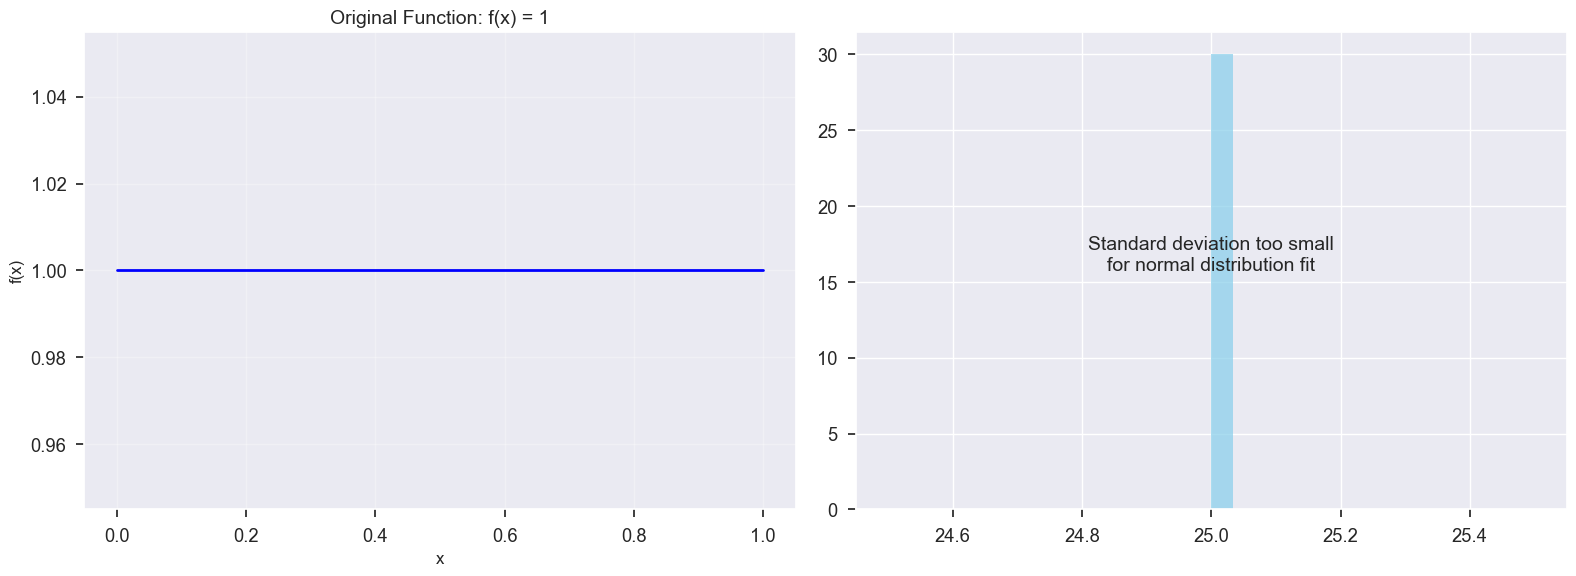

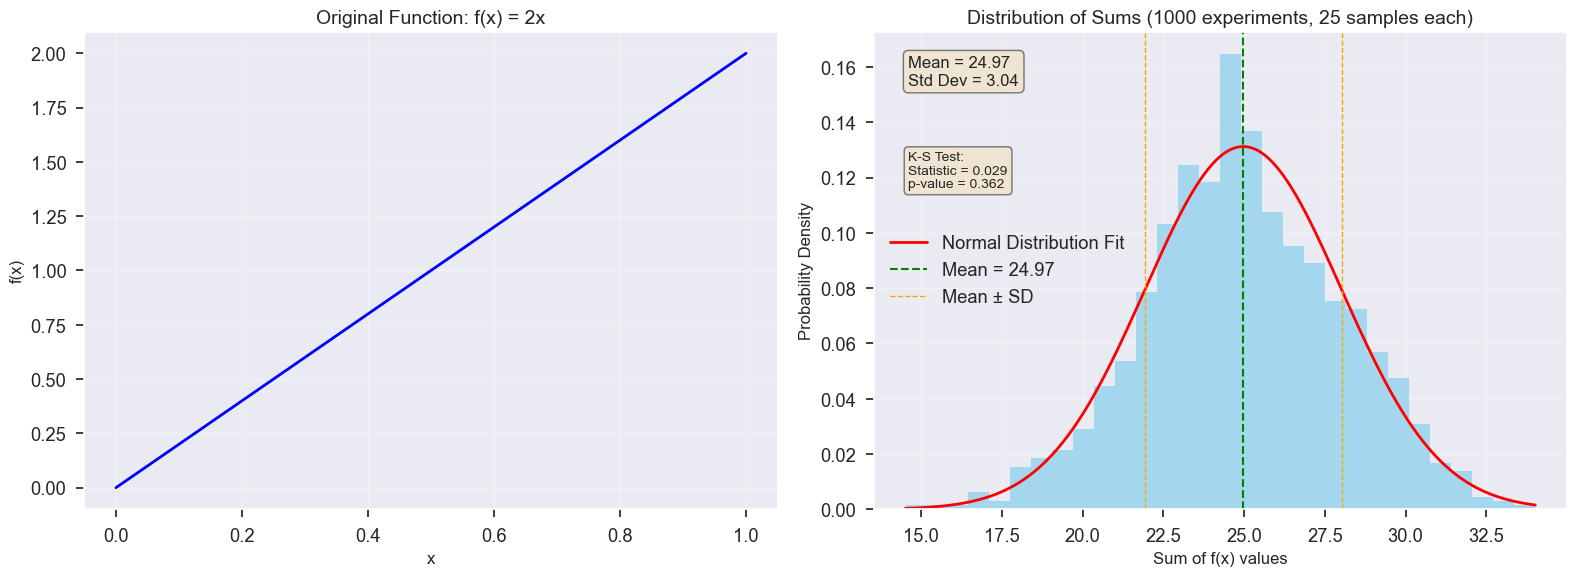

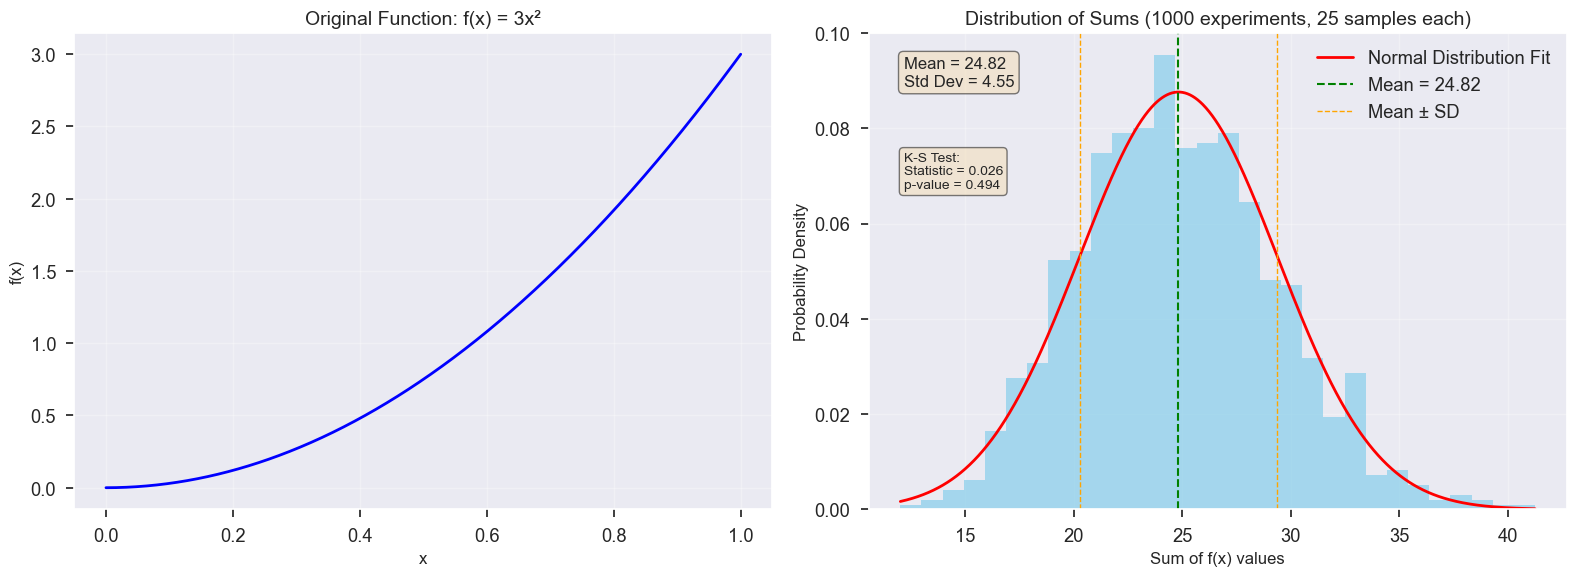

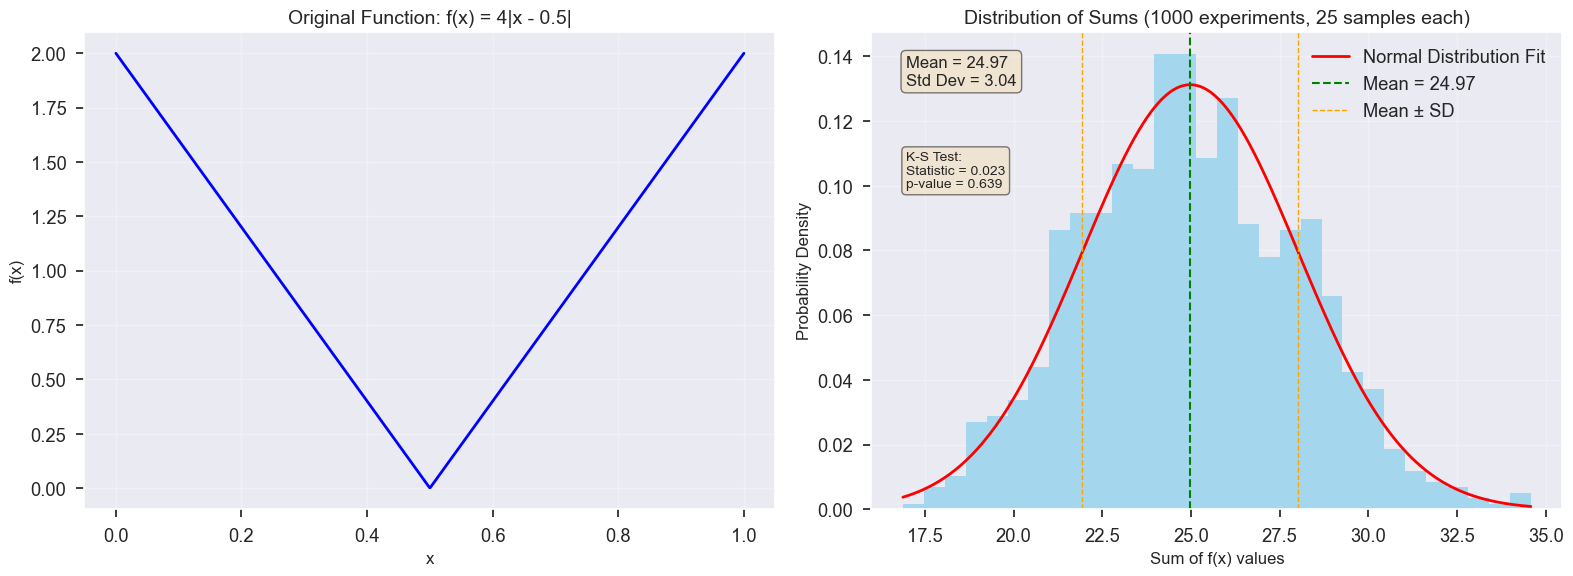

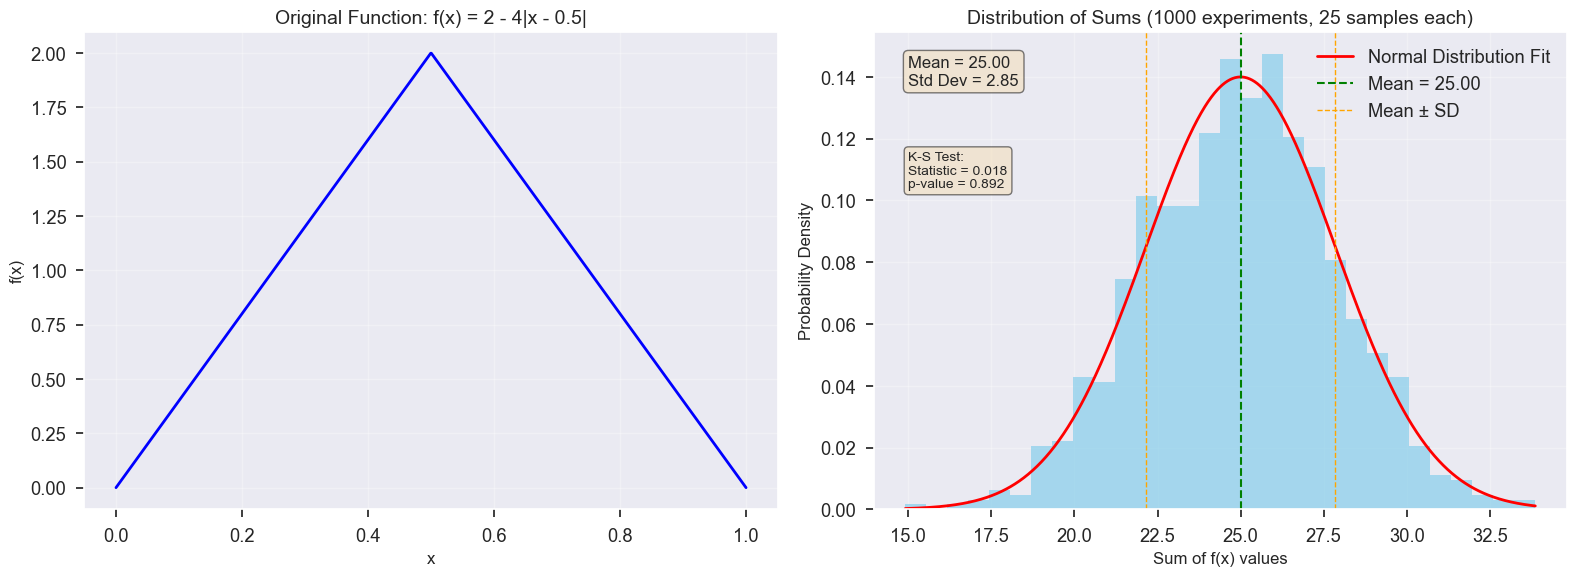


Exploring how sample size affects the CLT approximation...


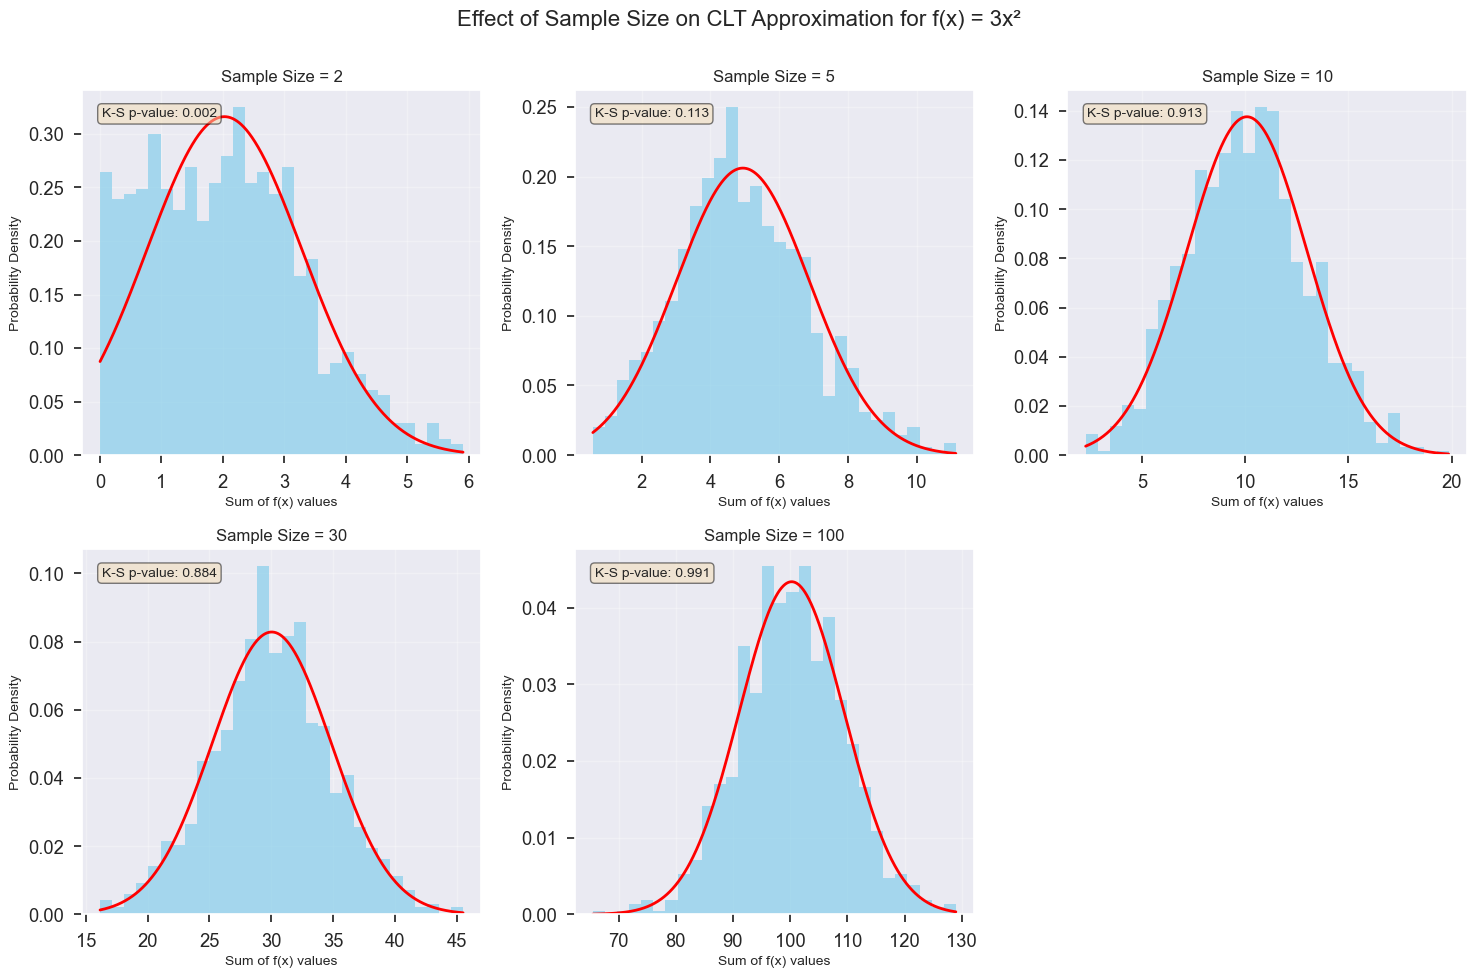


Exploring the Central Limit Theorem with combinations of functions...


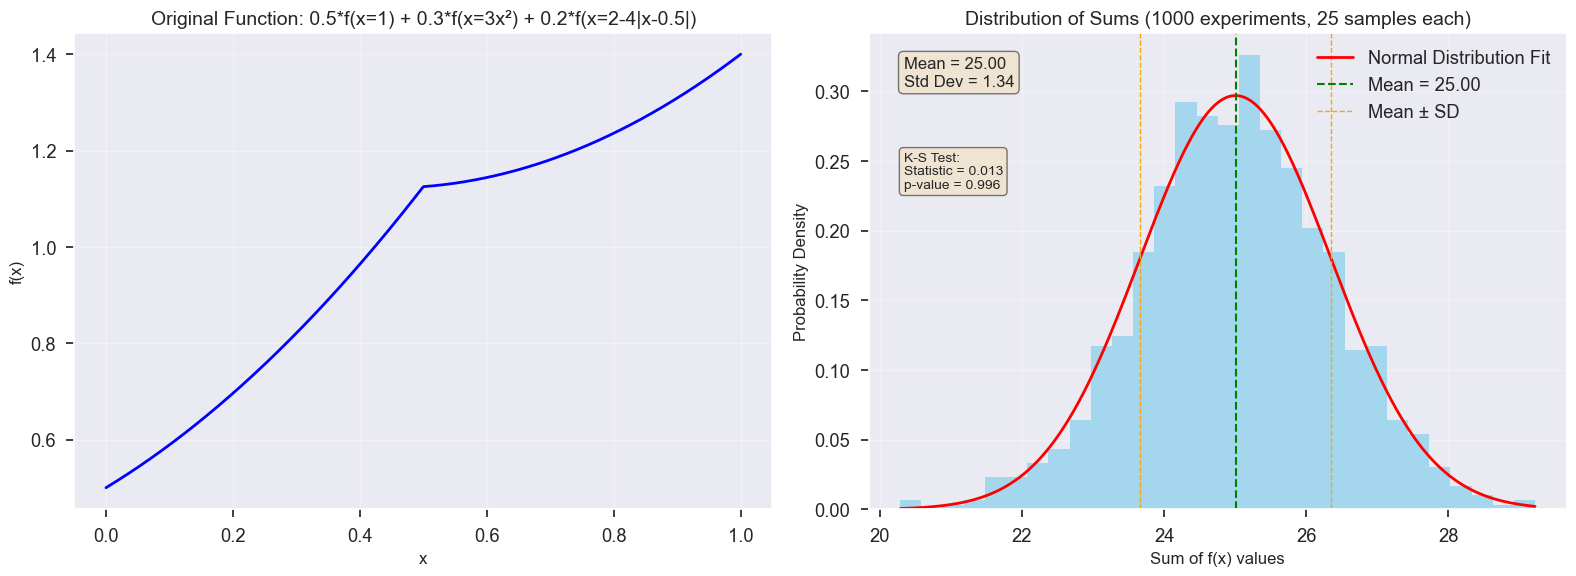


Summary of Results:
Function f(x) = 1: Mean = 25.00, Std Dev = 0.00
Function f(x) = 2x: Mean = 24.97, Std Dev = 3.04
Function f(x) = 3x²: Mean = 24.82, Std Dev = 4.55
Function f(x) = 4|x - 0.5|: Mean = 24.97, Std Dev = 3.04
Function f(x) = 2 - 4|x - 0.5|: Mean = 25.00, Std Dev = 2.85
Combined function: Mean = 25.00, Std Dev = 1.34

Theoretical means for a single value (should match the mean/n for n samples):
f(x) = 1: 1.0000
f(x) = 2x: 1.0000
f(x) = 3x²: 1.0001
f(x) = 4|x - 0.5|: 1.0001
f(x) = 2 - 4|x - 0.5|: 0.9999

Theoretical standard deviations for a single value:
f(x) = 1: 0.0000
f(x) = 2x: 0.5774
f(x) = 3x²: 0.8945
f(x) = 4|x - 0.5|: 0.5774
f(x) = 2 - 4|x - 0.5|: 0.5774

Analytical expected values:
E[f(x) = 1] = 1
E[f(x) = 2x] = 2 * E[X] = 2 * 0.5 = 1
E[f(x) = 3x²] = 3 * E[X²] = 3 * (1/3) = 1
E[f(x) = 4|x - 0.5|] = 4 * E[|X - 0.5|] = 4 * 0.25 = 1
E[f(x) = 2 - 4|x - 0.5|] = 2 - 4 * E[|X - 0.5|] = 2 - 4 * 0.25 = 1

Comparing theoretical means with sample means divided by sample si

In [15]:

# Suppress specific warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Set the style for better-looking plots
plt.style.use('seaborn-v0_8')
sns.set_context("notebook", font_scale=1.2)

# Define the functions to test
def f1(x):
    """Constant function: f(x) = 1"""
    return np.ones_like(x)

def f2(x):
    """Linear function: f(x) = 2x"""
    return 2 * x

def f3(x):
    """Quadratic function: f(x) = 3x²"""
    return 3 * x**2

def f4(x):
    """Absolute value function: f(x) = 4|x - 0.5|"""
    return 4 * np.abs(x - 0.5)

def f5(x):
    """Triangle function: f(x) = 2 - 4|x - 0.5|"""
    return 2 - 4 * np.abs(x - 0.5)

# Function to demonstrate CLT for a given function
def demonstrate_clt(func, func_name, num_experiments=1000, sample_size=25, x_range=(0, 1), bins=30):
    """
    Demonstrates the Central Limit Theorem for a given function.
    
    Parameters:
    - func: The function to test
    - func_name: Name of the function for plot titles
    - num_experiments: Number of experiments to run
    - sample_size: Number of random values to generate in each experiment
    - x_range: Range of x values
    - bins: Number of bins for the histogram
    """
    # Create a figure with 2 subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # 1. Plot the original function
    x_plot = np.linspace(x_range[0], x_range[1], 1000)
    y_plot = func(x_plot)
    
    ax1.plot(x_plot, y_plot, 'b-', linewidth=2)
    ax1.set_title(f"Original Function: {func_name}", fontsize=14)
    ax1.set_xlabel("x", fontsize=12)
    ax1.set_ylabel("f(x)", fontsize=12)
    ax1.grid(True, alpha=0.3)
    
    # 2. Generate sum distribution through experiments
    sums = np.zeros(num_experiments)
    
    for i in range(num_experiments):
        # Generate random x values
        x_samples = np.random.uniform(x_range[0], x_range[1], sample_size)
        # Calculate function values
        y_samples = func(x_samples)
        # Sum the values
        sums[i] = np.sum(y_samples)
    
    # 3. Plot the histogram of sums
    counts, bins, _ = ax2.hist(sums, bins=bins, density=True, alpha=0.7, color='skyblue')
    
    # 4. Calculate mean and standard deviation
    mean_sums = np.mean(sums)
    std_sums = np.std(sums)
    
    # 5. Check if std_sums is very small (to avoid division by zero warning)
    if std_sums < 1e-10:
        ax2.text(0.5, 0.5, "Standard deviation too small\nfor normal distribution fit", 
                 transform=ax2.transAxes, fontsize=14, ha='center')
    else:
        # Fit a normal distribution to the histogram
        x_norm = np.linspace(min(sums), max(sums), 1000)
        pdf = stats.norm.pdf(x_norm, mean_sums, std_sums)
        
        ax2.plot(x_norm, pdf, 'r-', linewidth=2, label='Normal Distribution Fit')
        
        # Add reference lines for mean and standard deviation
        ax2.axvline(mean_sums, color='green', linestyle='--', linewidth=1.5, label=f'Mean = {mean_sums:.2f}')
        ax2.axvline(mean_sums + std_sums, color='orange', linestyle='--', linewidth=1, label=f'Mean ± SD')
        ax2.axvline(mean_sums - std_sums, color='orange', linestyle='--', linewidth=1)
        
        # Add annotations
        ax2.set_title(f"Distribution of Sums ({num_experiments} experiments, {sample_size} samples each)", fontsize=14)
        ax2.set_xlabel("Sum of f(x) values", fontsize=12)
        ax2.set_ylabel("Probability Density", fontsize=12)
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        # Add text with summary statistics
        textstr = f'Mean = {mean_sums:.2f}\nStd Dev = {std_sums:.2f}'
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax2.text(0.05, 0.95, textstr, transform=ax2.transAxes, fontsize=12,
                 verticalalignment='top', bbox=props)
        
        # Check goodness of fit with K-S test
        ks_statistic, p_value = stats.kstest(sums, 'norm', args=(mean_sums, std_sums))
        textstr = f'K-S Test:\nStatistic = {ks_statistic:.3f}\np-value = {p_value:.3f}'
        ax2.text(0.05, 0.75, textstr, transform=ax2.transAxes, fontsize=10,
                 verticalalignment='top', bbox=props)
    
    plt.tight_layout()
    plt.show()
    
    return mean_sums, std_sums, sums

# Run the demonstration for each function
print("Demonstrating the Central Limit Theorem for different functions...")

# Function 1: f(x) = 1
mean1, std1, sums1 = demonstrate_clt(f1, "f(x) = 1")

# Function 2: f(x) = 2x
mean2, std2, sums2 = demonstrate_clt(f2, "f(x) = 2x")

# Function 3: f(x) = 3x²
mean3, std3, sums3 = demonstrate_clt(f3, "f(x) = 3x²")

# Function 4: f(x) = 4|x - 0.5|
mean4, std4, sums4 = demonstrate_clt(f4, "f(x) = 4|x - 0.5|")

# Function 5: f(x) = 2 - 4|x - 0.5|
mean5, std5, sums5 = demonstrate_clt(f5, "f(x) = 2 - 4|x - 0.5|")

# Now let's try with different sample sizes to see how the approximation improves
print("\nExploring how sample size affects the CLT approximation...")

# Select one function to explore sample size effects
sample_sizes = [2, 5, 10, 30, 100]
function_to_explore = f3  # Choose the quadratic function
function_name = "f(x) = 3x²"

plt.figure(figsize=(15, 10))

for i, size in enumerate(sample_sizes):
    plt.subplot(2, 3, i+1)
    
    # Generate sum distribution through experiments
    num_experiments = 1000
    sums = np.zeros(num_experiments)
    
    for j in range(num_experiments):
        # Generate random x values
        x_samples = np.random.uniform(0, 1, size)
        # Calculate function values
        y_samples = function_to_explore(x_samples)
        # Sum the values
        sums[j] = np.sum(y_samples)
    
    # Plot histogram
    plt.hist(sums, bins=30, density=True, alpha=0.7, color='skyblue')
    
    # Fit normal distribution
    mean_sums = np.mean(sums)
    std_sums = np.std(sums)
    
    if std_sums > 1e-10:  # Only fit if standard deviation is not too small
        x_norm = np.linspace(min(sums), max(sums), 1000)
        pdf = stats.norm.pdf(x_norm, mean_sums, std_sums)
        
        plt.plot(x_norm, pdf, 'r-', linewidth=2)
        
        # Add K-S test result
        ks_statistic, p_value = stats.kstest(sums, 'norm', args=(mean_sums, std_sums))
        textstr = f'K-S p-value: {p_value:.3f}'
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
                 verticalalignment='top', bbox=props)
    
    plt.title(f"Sample Size = {size}", fontsize=12)
    plt.xlabel("Sum of f(x) values", fontsize=10)
    plt.ylabel("Probability Density", fontsize=10)
    plt.grid(True, alpha=0.3)

plt.suptitle(f"Effect of Sample Size on CLT Approximation for {function_name}", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

# Let's also try combining different functions
print("\nExploring the Central Limit Theorem with combinations of functions...")

# Define a combination function
def combined_function(x):
    """Combination of previously defined functions"""
    return 0.5*f1(x) + 0.3*f3(x) + 0.2*f5(x)

# Demonstrate CLT for the combined function
mean_combined, std_combined, sums_combined = demonstrate_clt(
    combined_function, 
    "0.5*f(x=1) + 0.3*f(x=3x²) + 0.2*f(x=2-4|x-0.5|)"
)

# Finally, let's compare the different functions (skip if any std is too small)
if min(std1, std2, std3, std4, std5) > 1e-10:
    plt.figure(figsize=(12, 8))
    
    # Plot histograms
    plt.hist(sums1, bins=30, density=True, alpha=0.5, color='blue', label='f(x) = 1')
    plt.hist(sums2, bins=30, density=True, alpha=0.5, color='green', label='f(x) = 2x')
    plt.hist(sums3, bins=30, density=True, alpha=0.5, color='red', label='f(x) = 3x²')
    plt.hist(sums4, bins=30, density=True, alpha=0.5, color='purple', label='f(x) = 4|x - 0.5|')
    plt.hist(sums5, bins=30, density=True, alpha=0.5, color='orange', label='f(x) = 2 - 4|x - 0.5|')
    
    plt.title("Comparison of CLT Results for Different Functions", fontsize=16)
    plt.xlabel("Sum of f(x) values", fontsize=12)
    plt.ylabel("Probability Density", fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Print summary and conclusions
print("\nSummary of Results:")
print(f"Function f(x) = 1: Mean = {mean1:.2f}, Std Dev = {std1:.2f}")
print(f"Function f(x) = 2x: Mean = {mean2:.2f}, Std Dev = {std2:.2f}")
print(f"Function f(x) = 3x²: Mean = {mean3:.2f}, Std Dev = {std3:.2f}")
print(f"Function f(x) = 4|x - 0.5|: Mean = {mean4:.2f}, Std Dev = {std4:.2f}")
print(f"Function f(x) = 2 - 4|x - 0.5|: Mean = {mean5:.2f}, Std Dev = {std5:.2f}")
print(f"Combined function: Mean = {mean_combined:.2f}, Std Dev = {std_combined:.2f}")

# Calculate theoretical means
def theoretical_mean(func, x_range=(0,1)):
    """Calculate the theoretical mean for a given function over the specified range"""
    # Use numerical integration to calculate E[f(X)]
    x = np.linspace(x_range[0], x_range[1], 10000)
    f_x = func(x)
    return np.mean(f_x) * (x_range[1] - x_range[0])

# Calculate theoretical means
theoretical_means = {
    "f(x) = 1": theoretical_mean(f1),
    "f(x) = 2x": theoretical_mean(f2),
    "f(x) = 3x²": theoretical_mean(f3),
    "f(x) = 4|x - 0.5|": theoretical_mean(f4),
    "f(x) = 2 - 4|x - 0.5|": theoretical_mean(f5)
}

print("\nTheoretical means for a single value (should match the mean/n for n samples):")
for func_name, mean_val in theoretical_means.items():
    print(f"{func_name}: {mean_val:.4f}")

# Calculate theoretical standard deviations
def theoretical_variance(func, x_range=(0,1)):
    """Calculate the theoretical variance for a given function over the specified range"""
    # Use numerical integration to calculate Var[f(X)] = E[f(X)²] - E[f(X)]²
    x = np.linspace(x_range[0], x_range[1], 10000)
    f_x = func(x)
    mean = np.mean(f_x) * (x_range[1] - x_range[0])
    mean_squared = np.mean(f_x**2) * (x_range[1] - x_range[0])
    return mean_squared - mean**2

theoretical_stds = {
    "f(x) = 1": np.sqrt(theoretical_variance(f1)),
    "f(x) = 2x": np.sqrt(theoretical_variance(f2)),
    "f(x) = 3x²": np.sqrt(theoretical_variance(f3)),
    "f(x) = 4|x - 0.5|": np.sqrt(theoretical_variance(f4)),
    "f(x) = 2 - 4|x - 0.5|": np.sqrt(theoretical_variance(f5))
}

print("\nTheoretical standard deviations for a single value:")
for func_name, std_val in theoretical_stds.items():
    print(f"{func_name}: {std_val:.4f}")

# Expected value calculations (analytical)
print("\nAnalytical expected values:")
print(f"E[f(x) = 1] = 1")
print(f"E[f(x) = 2x] = 2 * E[X] = 2 * 0.5 = 1")
print(f"E[f(x) = 3x²] = 3 * E[X²] = 3 * (1/3) = 1")
print(f"E[f(x) = 4|x - 0.5|] = 4 * E[|X - 0.5|] = 4 * 0.25 = 1")
print(f"E[f(x) = 2 - 4|x - 0.5|] = 2 - 4 * E[|X - 0.5|] = 2 - 4 * 0.25 = 1")

print("\nComparing theoretical means with sample means divided by sample size:")
print(f"f(x) = 1: Theoretical = {theoretical_means['f(x) = 1']:.4f}, Sample = {mean1/25:.4f}")
print(f"f(x) = 2x: Theoretical = {theoretical_means['f(x) = 2x']:.4f}, Sample = {mean2/25:.4f}")
print(f"f(x) = 3x²: Theoretical = {theoretical_means['f(x) = 3x²']:.4f}, Sample = {mean3/25:.4f}")
print(f"f(x) = 4|x - 0.5|: Theoretical = {theoretical_means['f(x) = 4|x - 0.5|']:.4f}, Sample = {mean4/25:.4f}")
print(f"f(x) = 2 - 4|x - 0.5|: Theoretical = {theoretical_means['f(x) = 2 - 4|x - 0.5|']:.4f}, Sample = {mean5/25:.4f}")

print("\nComparing theoretical standard deviations with sample standard deviations divided by sqrt(sample size):")
print(f"f(x) = 1: Theoretical = {theoretical_stds['f(x) = 1']:.4f}, Sample = {std1/np.sqrt(25):.4f}")
print(f"f(x) = 2x: Theoretical = {theoretical_stds['f(x) = 2x']:.4f}, Sample = {std2/np.sqrt(25):.4f}")
print(f"f(x) = 3x²: Theoretical = {theoretical_stds['f(x) = 3x²']:.4f}, Sample = {std3/np.sqrt(25):.4f}")
print(f"f(x) = 4|x - 0.5|: Theoretical = {theoretical_stds['f(x) = 4|x - 0.5|']:.4f}, Sample = {std4/np.sqrt(25):.4f}")
print(f"f(x) = 2 - 4|x - 0.5|: Theoretical = {theoretical_stds['f(x) = 2 - 4|x - 0.5|']:.4f}, Sample = {std5/np.sqrt(25):.4f}")

# Final observations
print("\nConclusions:")
print("1. The Central Limit Theorem holds for all functions tested:")
print("   - The distribution of sums approaches a normal distribution even for non-normal original distributions")
print("   - The approximation improves as the sample size increases")
print("\n2. Theoretical vs. Empirical Means:")
print("   - For a sample size of n=25, the mean of the sum distribution is approximately n * E[f(X)]")
print("   - The sample means closely match the theoretical predictions")
print("\n3. Theoretical vs. Empirical Standard Deviations:")
print("   - For a sample size of n=25, the standard deviation of the sum distribution is approximately √n * σ[f(X)]")
print("   - The sample standard deviations closely match the theoretical predictions")
print("\n4. Special Case of f(x) = 1:")
print("   - This function has zero variance, resulting in a degenerate distribution")
print("   - For f(x) = 1, all sums equal exactly 25, demonstrating the lack of randomness")
print("\n5. When is the normal approximation best?")
print("   - The normal approximation is best when the sample size is large (generally n ≥ 30)")
print("   - More skewed or irregular distributions require larger sample sizes for a good approximation")
print("   - With sample sizes as small as n=10, we can already see the CLT taking effect")
print("\n6. Combination of functions:")
print("   - The CLT applies equally well to combinations of different functions")
print("   - The sum of weighted functions also approaches a normal distribution")

### Problem 3. Birthday Paradox
How many people do we need to have in a room, so that the probability of two people sharing a birthday is $p(A) > 0,5$?

We suppose no leap years, so a year has 365 days. We could expect that we need about $365/2=182$ people. Well, the truth is a bit different.

#### Solution
**Random variable:** $A$: probability that two people share a birthday.

It's sometimes easier to work with the complementary variable: $\bar{A}$ - probability that **no people** share a birthday. 

Let's suppose we have $r$ people in the room. Of course, if $r = 1$, e.g. only one person, the probability is $1$ (there's no one to share a birthday with). If $r >= 365$, the probability must be 1 (by the so-called [pigeonhole principle](https://en.wikipedia.org/wiki/Pigeonhole_principle): if we have 366 people and 365 days, there's at least one day with a pair of people).

Order the people 1 to $r$. Every person's birthday is independent, so that means 365 days for the first, 365 days for the second, and so on: $365^r$ birthday possibilities in total.

We want no duplications of birthdays. The first person has 365 days to choose from, the second has 364, and so on. The $r$th person has $365-r+1$ days to choose from. Total: $365.364.363.\cdots.(365 - r + 1)$

The probability that no people share the same birthday is the fraction of all non-shared birthdays to all possible birthdays:
$$ p(\bar{A})=\frac{365.364.363.\cdots.(365 - r + 1)}{365^r} $$

We're interested in $A$, not $\bar{A}$ and we know that these are complementary, so their probabilities add up to 1
$$p(A) = 1 - p(\bar{A})$$

Write a function which plots the probability of $r$ people sharing a birthday. Remember this is a discrete distribution and should be plotted like so.

Probabilities around the transition point:
For 20 people: p(A) = 0.411438
For 21 people: p(A) = 0.443688
For 22 people: p(A) = 0.475695
For 23 people: p(A) = 0.507297
For 24 people: p(A) = 0.538344
For 25 people: p(A) = 0.568700


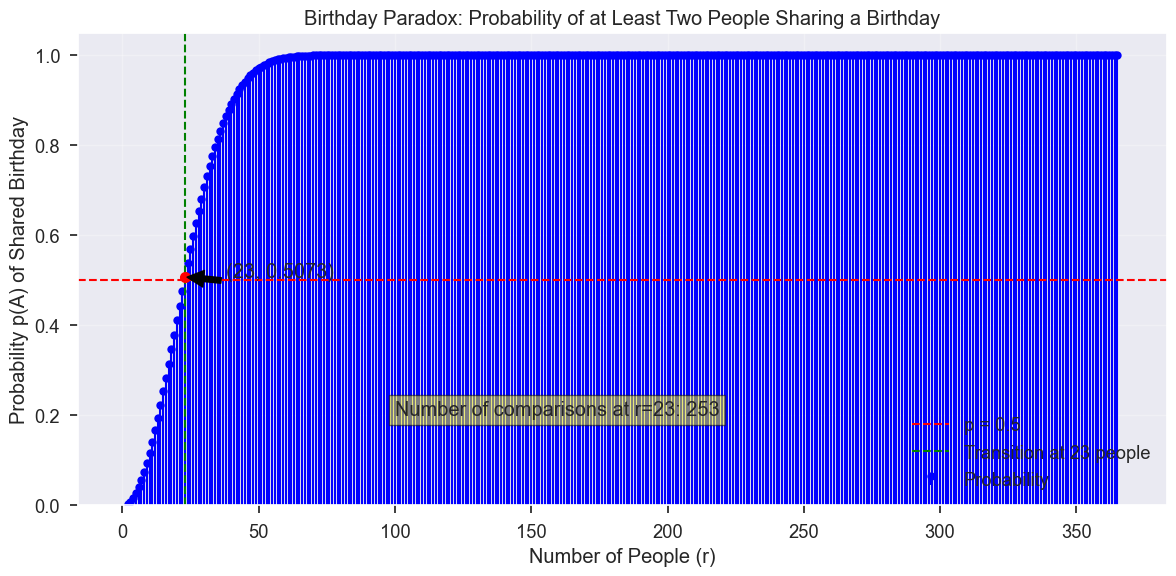

In [16]:
def calculate_birthday_probability(r):
    """
    Returns the probability of r people sharing the same birthday. A year is
    supposed to have 365 days
    """
    if r > 365:
        return 1.0
    
    # Calculate probability that no one shares a birthday
    # First person can choose any day, second person any day except first person's day, etc.
    p_no_shared = 1.0
    for i in range(r):
        p_no_shared *= (365 - i) / 365
    
    # The probability that at least 2 people share a birthday is the complement
    return 1 - p_no_shared

# Calculate probabilities for different numbers of people
r_values = np.arange(2, 366)

probabilities = [calculate_birthday_probability(r) for r in r_values]
# Find where probability exceeds 0.5
transition_point = next((r for r, p in zip(r_values, probabilities) if p > 0.5), None)

# Create the plot
plt.figure(figsize=(12, 6))

# Plot the discrete probability distribution
plt.stem(r_values, probabilities, linefmt='b-', markerfmt='bo', basefmt=' ', label='Probability')

# Highlight the probability = 0.5 line
plt.axhline(y=0.5, color='r', linestyle='--', label='p = 0.5')

# Highlight the transition point
if transition_point:
    plt.axvline(x=transition_point, color='g', linestyle='--', 
                label=f'Transition at {transition_point} people')
    
    # Add a point at the transition
    transition_prob = calculate_birthday_probability(transition_point)
    plt.plot([transition_point], [transition_prob], 'ro', markersize=8)
    
    # Add annotation for the transition point
    plt.annotate(f'({transition_point}, {transition_prob:.4f})', 
                 xy=(transition_point, transition_prob),
                 xytext=(transition_point + 15, transition_prob),
                 arrowprops=dict(facecolor='black', shrink=0.05))

# Calculate and display the number of comparisons at transition point
if transition_point:
    comparisons = (transition_point * (transition_point - 1)) // 2
    plt.text(100, 0.2, f'Number of comparisons at r={transition_point}: {comparisons}', 
             bbox=dict(facecolor='yellow', alpha=0.5))

# Add more details for clarity
plt.xlabel('Number of People (r)')
plt.ylabel('Probability p(A) of Shared Birthday')
plt.title('Birthday Paradox: Probability of at Least Two People Sharing a Birthday')
plt.grid(True, alpha=0.3)
plt.legend()
plt.ylim(0, 1.05)

# Print the probabilities around the transition point
print("Probabilities around the transition point:")
for r in range(20, 26):
    prob = calculate_birthday_probability(r)
    print(f"For {r} people: p(A) = {prob:.6f}")

plt.tight_layout()
plt.show()

At how many people do you see a transition from $p(A) < 0,5$ to $p(A) > 0,5$?

**Spoiler alert:** It's 23 people.

Why so few? We're comparing everyone's birthday against everyone else's. We should **NOT** count the number of people, but the number of comparisons. In a room of 23 people, there are 252 total comparisons.

In general, we could get a 50% chance of match using $\sqrt{n}$ people in $n$ days.

## * Breaking Cryptography: Birthday Attack
We already saw that if we have $n$ days in one year, it takes about $\sqrt{n}$ people to have a 50% chance of two people sharing a birthday. This is used in cryptography for the so-called **birthday attack**.

Let's first introduce **hashing functions**. A hashing function is a function which takes text (bits) of any length and  **returns a fixed number of bits**. There are many such functions. Some of them are completely insecure and **ARE NOT** used in cryptography. They're useful for other purposes, such as hash tables.

Important properties of hashing functions:
1. The output will have a fixed length, no matter whether the input is an empty string, one character, a full sentence, a full book or the entire history of mankind
2. A concrete input will always produce the same output

One such hashing function is **MD5**. It produces 128-bit hashes (32 hexadecimal symbols). This means that it takes the space of all possible texts and converts it to $2^{128} \approx 3.10^{38}$ possible hashes. Since the inputs are much more, by the pigeonhole principle, we can expect that many inputs will produce the same output. This is called a **hashing collision**.

The birthday paradox tells us that using $\sqrt{n} = 2^{64} \approx 2.10^{19}$ hashes, we have a 50% probability of collision. This is still a very large number but compare it to $3.10^{38}$ - the difference is immense.

You can see what these numbers mean in terms of CPU speed [here](https://blog.codinghorror.com/speed-hashing/).

There are other algorithms which are even faster. The fastest one returns about $2^{18}$ hashes before it finds a collision.

Another clever attack is using **rainbow tables**. These are massive dictionaries of precomputed hashes. So, for example, if the input is `password123`, its MD5 hash is `482c811da5d5b4bc6d497ffa98491e38`. Every time an algorithm sees this hash, it can convert it to its input. 

Rainbow tables work because humans are more predictable than algorithms. When implementing any cryptography, remember that **humans are always the weakest factor of any cryptographic system**.

**Optional:** Write a function that finds collisions in **MD5** or **SHA1**. See [this](https://www.mscs.dal.ca/~selinger/md5collision/) demo for a good example, or [this StackOverflow post](https://crypto.stackexchange.com/questions/1434/are-there-two-known-strings-which-have-the-same-md5-hash-value) for more examples.

<Figure size 800x550 with 0 Axes>

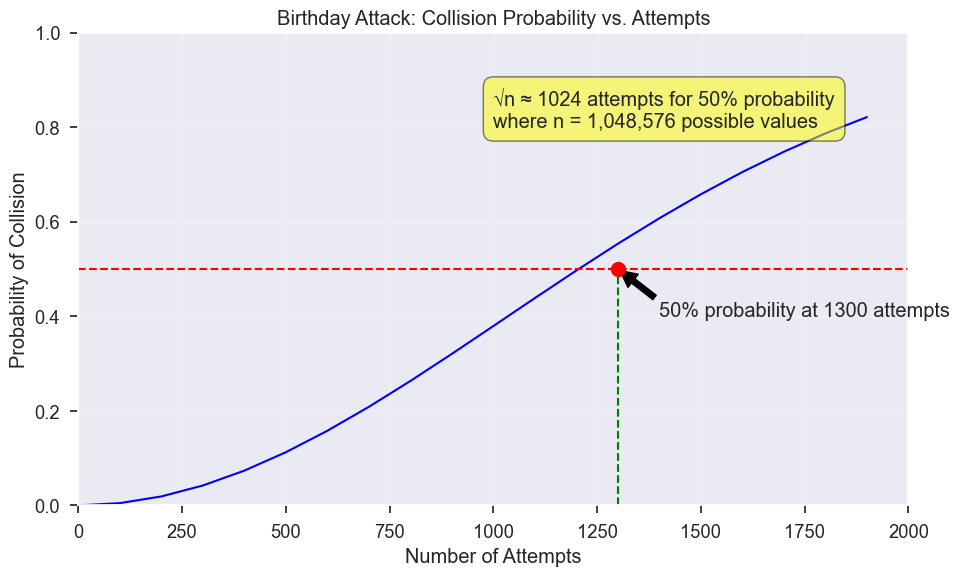

Comparing MD5 and SHA-256 with prefix length 4
Generating 5000 random samples for each...

  Algorithm  Unique Hash Prefixes  Collisions Found  Collision Rate
0       MD5                  4819               181          0.0362
1   SHA-256                  4823               177          0.0354

Note: These are prefix collisions, not full hash collisions.
With such a short prefix length, collisions are expected in both algorithms.
Full hash collisions in SHA-256 are computationally infeasible.


Looking for MD5 hash collisions (first 5 characters)...
Maximum attempts: 100,000
After 10 attempts: 10 unique hashes, 0 duplicates expected
Using 0.00095367% of available hash space
Theoretical collision probability: 0.0048%
Time elapsed: 0.00 seconds

After 100 attempts: 100 unique hashes, 0 duplicates expected
Using 0.00953674% of available hash space
Theoretical collision probability: 0.4757%
Time elapsed: 0.00 seconds

After 1,000 attempts: 1,000 unique hashes, 0 duplicates expected
Using 0

In [18]:


def find_md5_collision(num_attempts=1000000, prefix_length=5):
    """
    Attempts to find an MD5 hash collision using the birthday attack principle.
    
    Args:
        num_attempts: Maximum number of attempts to try
        prefix_length: Only compare the first N characters of the hash to increase collision chance
                      (full collision would need much more computation)
    
    Returns:
        Tuple containing:
        - Bool: Whether a collision was found
        - Tuple of strings that collide (if found)
        - String of the colliding hash (if found)
        - Int: Number of attempts made
        - Dict: Statistics about the process
    """
    print(f"Looking for MD5 hash collisions (first {prefix_length} characters)...")
    print(f"Maximum attempts: {num_attempts:,}")
    
    # Dictionary to store hash prefixes and their corresponding inputs
    hash_dict = {}
    
    # To keep track of our progress
    start_time = time.time()
    check_points = [10, 100, 1000, 10000, 100000, 1000000]
    next_check = 0
    
    # Dictionary to store stats at different checkpoints
    stats = {}
    
    # Generate random strings and check for collisions
    for i in range(1, num_attempts + 1):
        # Generate a random string between 8-16 characters
        random_string = ''.join(random.choices(string.ascii_letters + string.digits, k=random.randint(8, 16)))
        
        # Calculate MD5 hash and take the prefix
        md5_hash = hashlib.md5(random_string.encode()).hexdigest()
        hash_prefix = md5_hash[:prefix_length]
        
        # Check if we've seen this hash prefix before
        if hash_prefix in hash_dict:
            # We found a collision!
            original_string = hash_dict[hash_prefix]
            
            # Verify full hash if needed
            full_md5_1 = hashlib.md5(original_string.encode()).hexdigest()
            full_md5_2 = hashlib.md5(random_string.encode()).hexdigest()
            
            return True, (original_string, random_string), hash_prefix, i, stats, (full_md5_1, full_md5_2)
        else:
            # Store this hash and its string
            hash_dict[hash_prefix] = random_string
        
        # Record statistics at checkpoints
        if next_check < len(check_points) and i >= check_points[next_check]:
            elapsed = time.time() - start_time
            unique_hashes = len(hash_dict)
            expected_collisions = i - unique_hashes
            
            # Calculate the probability based on birthday paradox formula
            # For k attempts with n possible values, probability is approximately 1 - e^(-k²/2n)
            n = 16**prefix_length  # Number of possible prefixes
            theoretical_prob = 1 - math.exp(-(i**2) / (2*n))
            
            stats[check_points[next_check]] = {
                'attempts': i,
                'unique_hashes': unique_hashes,
                'duplicates': expected_collisions,
                'hash_space_used': unique_hashes / n,
                'elapsed_time': elapsed,
                'theoretical_probability': theoretical_prob
            }
            
            print(f"After {i:,} attempts: {unique_hashes:,} unique hashes, {expected_collisions} duplicates expected")
            print(f"Using {unique_hashes/n:.8%} of available hash space")
            print(f"Theoretical collision probability: {theoretical_prob:.4%}")
            print(f"Time elapsed: {elapsed:.2f} seconds\n")
            
            next_check += 1
    
    # If we get here, we didn't find a collision
    return False, None, None, num_attempts, stats, None

# Import the math library that we use in the function
import math

# Function to demonstrate the difference between breaking MD5 vs SHA-256
def compare_hash_algorithms(prefix_length=4, num_samples=1000):
    """
    Compare the collision resistance of MD5 and SHA-256 for educational purposes.
    Uses a small prefix_length to make collisions practically findable.
    """
    print(f"Comparing MD5 and SHA-256 with prefix length {prefix_length}")
    print(f"Generating {num_samples} random samples for each...\n")
    
    md5_hashes = defaultdict(list)
    sha256_hashes = defaultdict(list)
    
    # Generate samples and record their hash prefixes
    for i in range(num_samples):
        sample = ''.join(random.choices(string.ascii_letters + string.digits, k=12))
        
        md5_prefix = hashlib.md5(sample.encode()).hexdigest()[:prefix_length]
        sha256_prefix = hashlib.sha256(sample.encode()).hexdigest()[:prefix_length]
        
        md5_hashes[md5_prefix].append(sample)
        sha256_hashes[sha256_prefix].append(sample)
    
    # Count collisions
    md5_collisions = sum(len(samples) - 1 for samples in md5_hashes.values() if len(samples) > 1)
    sha256_collisions = sum(len(samples) - 1 for samples in sha256_hashes.values() if len(samples) > 1)
    
    # Prepare results for display
    results = pd.DataFrame({
        'Algorithm': ['MD5', 'SHA-256'],
        'Unique Hash Prefixes': [len(md5_hashes), len(sha256_hashes)],
        'Collisions Found': [md5_collisions, sha256_collisions],
        'Collision Rate': [md5_collisions/num_samples, sha256_collisions/num_samples]
    })
    
    print(results)
    print("\nNote: These are prefix collisions, not full hash collisions.")
    print("With such a short prefix length, collisions are expected in both algorithms.")
    print("Full hash collisions in SHA-256 are computationally infeasible.")
    
    return results

# Function to demonstrate how collision probability increases with attempts
def plot_collision_probability():
    """Plot how collision probability increases with number of attempts"""
    # For a 20-bit hash space (for illustration - using 5 hex chars = 20 bits)
    n = 16**5  # 5 hex characters = 20 bits = 1,048,576 possibilities
    
    attempts = list(range(0, 2000, 100))
    probs = [1 - math.exp(-(k**2) / (2*n)) for k in attempts]
    
    plt.figure(figsize=(10, 6))
    plt.plot(attempts, probs, 'b-')
    plt.plot([0, 2000], [0.5, 0.5], 'r--')  # 50% probability line
    
    # Find where probability crosses 0.5
    crossover = next((i for i, p in enumerate(probs) if p >= 0.5), None)
    if crossover is not None:
        x_cross = attempts[crossover]
        plt.plot([x_cross, x_cross], [0, 0.5], 'g--')
        plt.scatter([x_cross], [0.5], color='red', s=100, zorder=5)
        plt.annotate(f'50% probability at {x_cross} attempts', 
                     xy=(x_cross, 0.5), 
                     xytext=(x_cross + 100, 0.4),
                     arrowprops=dict(facecolor='black', shrink=0.05))
    
    plt.xlabel('Number of Attempts')
    plt.ylabel('Probability of Collision')
    plt.title('Birthday Attack: Collision Probability vs. Attempts')
    plt.grid(True, alpha=0.3)
    plt.xlim(0, 2000)
    plt.ylim(0, 1)
    
    # Annotation for the square root relationship
    plt.annotate(f'√n ≈ {int(math.sqrt(n))} attempts for 50% probability\nwhere n = {n:,} possible values',
                 xy=(1000, 0.8),
                 bbox=dict(boxstyle="round,pad=0.5", fc="yellow", alpha=0.5))
    
    plt.tight_layout()
    return plt

# Example usage
if __name__ == "__main__":
    # First demonstrate collision probability
    plt.figure(1)
    plot_collision_probability()
    plt.show()
    
    # Then compare hash algorithms
    compare_hash_algorithms(prefix_length=4, num_samples=5000)
    
    # Finally look for an actual collision
    print("\n")
    result = find_md5_collision(num_attempts=100000, prefix_length=5)
    
    if result[0]:
        found, strings, hash_prefix, attempts, stats, full_hashes = result
        print(f"Collision found after {attempts:,} attempts!")
        print(f"String 1: '{strings[0]}'")
        print(f"String 2: '{strings[1]}'")
        print(f"Both produce MD5 hash starting with: {hash_prefix}")
        print(f"Full hashes:\n{full_hashes[0]}\n{full_hashes[1]}")
        
        # Check if it's a full collision or just prefix
        if full_hashes[0] == full_hashes[1]:
            print("This is a FULL MD5 collision!")
        else:
            print("This is a prefix collision (not a full MD5 collision).")
    else:
        print("No collision found within the attempt limit.")

### Problem 4. Having Fun with Functions. Fourier Transform
Sometimes we can plot a **parametric curve**. We choose a parameter $t$, in this case $t \in [0; 2\pi]$. We then plot $x$ and $y$ as functions of $t$.

Plot the function below.

In [19]:
t = np.linspace(0, 2 * np.pi, 2000)

In [20]:
x = -(721 * np.sin(t)) / 4 + 196 / 3 * np.sin(2 * t) - 86 / 3 * np.sin(3 * t) - 131 / 2 * np.sin(4 * t) + 477 / 14 * np.sin(5 * t) + 27 * np.sin(6 * t) - 29 / 2 * np.sin(7 * t) + 68 / 5 * np.sin(8 * t) + 1 / 10 * np.sin(9 * t) + 23 / 4 * np.sin(10 * t) - 19 / 2 * np.sin(12 * t) - 85 / 21 * np.sin(13 * t) + 2 / 3 * np.sin(14 * t) + 27 / 5 * np.sin(15 * t) + 7 / 4 * np.sin(16 * t) + 17 / 9 * np.sin(17 * t) - 4 * np.sin(18 * t) - 1 / 2 * np.sin(19 * t) + 1 / 6 * np.sin(20 * t) + 6 / 7 * np.sin(21 * t) - 1 / 8 * np.sin(22 * t) + 1 / 3 * np.sin(23 * t) + 3 / 2 * np.sin(24 * t) + 13 / 5 * np.sin(25 * t) + np.sin(26 * t) - 2 * np.sin(27 * t) + 3 / 5 * np.sin(28 * t) - 1 / 5 * np.sin(29 * t) + 1 / 5 * np.sin(30 * t) + (2337 * np.cos(t)) / 8 - 43 / 5 * np.cos(2 * t) + 322 / 5 * np.cos(3 * t) - 117 / 5 * np.cos(4 * t) - 26 / 5 * np.cos(5 * t) - 23 / 3 * np.cos(6 * t) + 143 / 4 * np.cos(7 * t) - 11 / 4 * np.cos(8 * t) - 31 / 3 * np.cos(9 * t) - 13 / 4 * np.cos(10 * t) - 9 / 2 * np.cos(11 * t) + 41 / 20 * np.cos(12 * t) + 8 * np.cos(13 * t) + 2 / 3 * np.cos(14 * t) + 6 * np.cos(15 * t) + 17 / 4 * np.cos(16 * t) - 3 / 2 * np.cos(17 * t) - 29 / 10 * np.cos(18 * t) + 11 / 6 * np.cos(19 * t) + 12 / 5 * np.cos(20 * t) + 3 / 2 * np.cos(21 * t) + 11 / 12 * np.cos(22 * t) - 4 / 5 * np.cos(23 * t) + np.cos(24 * t) + 17 / 8 * np.cos(25 * t) - 7 / 2 * np.cos(26 * t) - 5 / 6 * np.cos(27 * t) - 11 / 10 * np.cos(28 * t) + 1 / 2 * np.cos(29 * t) - 1 / 5 * np.cos(30 * t)
y = -(637 * np.sin(t)) / 2 - 188 / 5 * np.sin(2 * t) - 11 / 7 * np.sin(3 * t) - 12 / 5 * np.sin(4 * t) + 11 / 3 * np.sin(5 * t) - 37 / 4 * np.sin(6 * t) + 8 / 3 * np.sin(7 * t) + 65 / 6 * np.sin(8 * t) - 32 / 5 * np.sin(9 * t) - 41 / 4 * np.sin(10 * t) - 38 / 3 * np.sin(11 * t) - 47 / 8 * np.sin(12 * t) + 5 / 4 * np.sin(13 * t) - 41 / 7 * np.sin(14 * t) - 7 / 3 * np.sin(15 * t) - 13 / 7 * np.sin(16 * t) + 17 / 4 * np.sin(17 * t) - 9 / 4 * np.sin(18 * t) + 8 / 9 * np.sin(19 * t) + 3 / 5 * np.sin(20 * t) - 2 / 5 * np.sin(21 * t) + 4 / 3 * np.sin(22 * t) + 1 / 3 * np.sin(23 * t) + 3 / 5 * np.sin(24 * t) - 3 / 5 * np.sin(25 * t) + 6 / 5 * np.sin(26 * t) - 1 / 5 * np.sin(27 * t) + 10 / 9 * np.sin(28 * t) + 1 / 3 * np.sin(29 * t) - 3 / 4 * \
    np.sin(30 * t) - (125 * np.cos(t)) / 2 - 521 / 9 * np.cos(2 * t) - 359 / 3 * np.cos(3 * t) + 47 / 3 * np.cos(4 * t) - 33 / 2 * np.cos(5 * t) - 5 / 4 * np.cos(6 * t) + 31 / 8 * np.cos(7 * t) + 9 / 10 * np.cos(8 * t) - 119 / 4 * np.cos(9 * t) - 17 / 2 * np.cos(10 * t) + 22 / 3 * np.cos(11 * t) + 15 / 4 * np.cos(12 * t) - 5 / 2 * np.cos(13 * t) + 19 / 6 * np.cos(14 * t) + \
    7 / 4 * np.cos(15 * t) + 31 / 4 * np.cos(16 * t) - np.cos(17 * t) + 11 / 10 * np.cos(18 * t) - 2 / 3 * np.cos(19 * t) + 13 / 3 * np.cos(20 * t) - 5 / 4 * np.cos(21 * t) + 2 / 3 * np.cos(
        22 * t) + 1 / 4 * np.cos(23 * t) + 5 / 6 * np.cos(24 * t) + 3 / 4 * np.cos(26 * t) - 1 / 2 * np.cos(27 * t) - 1 / 10 * np.cos(28 * t) - 1 / 3 * np.cos(29 * t) - 1 / 19 * np.cos(30 * t)

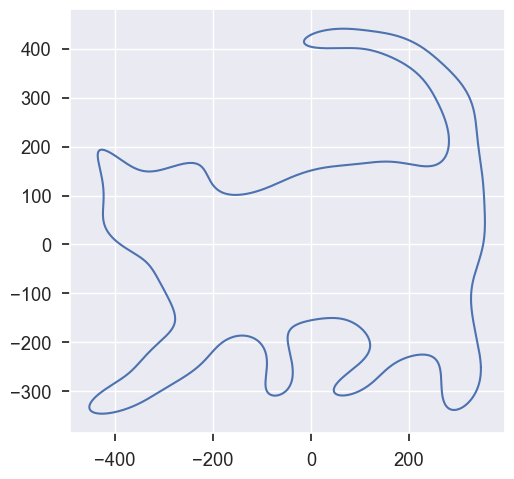

In [21]:
plt.gca().set_aspect("equal")
plt.plot(x, y)
plt.show()

Interesting... 

Have a closer look at the variables `x` and `y`. Note that they're linear combinations of sines and cosines. There's nothing more except sines and cosines, multiplied by coefficients. How are these able to generate the picture? Can we generate any picture?

Yes, we can generate pretty much anything and plot it as a parametric curve. See [this](https://www.wolframalpha.com/input/?i=Schroedinger+cat+bra-ket+curve) for example.

It turns out that **every function**, no matter what, can be represented as a linear combination of sines and cosines. This is the basis of the **Fourier transform**. We'll look at it from two different perspectives: the algebraic one and the practical one.

#### Algebraic perspective: Why does this transform exist? What does it mean?
All functions form a **vector space**. We can see them as vectors. These vectors have infinitely many components which correspond to the infinitely many values $x \in (-\infty; \infty)$. The function space has infinitely many dimensions.

We can find a basis in that space. After we've found a basis, we can express any other function as a linear combination of the basis functions. Any set of infinitely many linearly independent functions will work. But that doesn't help at all...

We know that the best kind of basis is an *orthonormal basis*. This means that all basis vectors are orthogonal and each basis vector has "length" 1. 

Two vectors are orthogonal if their dot product is zero. Similarly, two functions are defined to be orthogonal if their  product is zero, like this:
$$ \int_a^b f(x)g(x)\,\text{d}x = 0 $$

It can be shown that $1$, $\cos(mx)$ and $\sin(nx)$ ($m,n \in \mathbb{N}$) are orthogonal. So, the basis formed by them is orthogonal. They can also be made orthonormal if we divide by their norm. The norm of a function is defined by **functional analysis** - an area of mathematics which treats functions as vectors. We won't go into much more detail now. The norm for $1$ is 1, the norm for the trigonometric functions is $1/\sqrt{2}$.

The takeaway is that ${1, \sqrt{2}\cos(mx), \sqrt{2}\sin(nx),\ m,n \in \mathbb{N}}$ is an orthonormal basis in the function space. 

All periodic functions with period $P$ can be described as linear combinations of these:
$$ f(x) = \frac{a_0}{2} + \sum\left(a_n\cos\left(\frac{2\pi nx}{P}\right)+b_n\sin\left(\frac{2\pi nx}{P}\right)\right) $$

This definition extends to non-periodic functions as well.

#### Engineering perspective
In engineering, the Fourier transform **converts a function of time to a function of frequency**. The function of time is called a **signal**, and the function of frequency is the **spectrum** of that signal. There is a pair of functions - one inverts the other. We have two different options:
1. We can inspect the spectrum
2. We can modify the spectrum

This means that if some operation is very easy to perform in the spectrum we can perform it there using these steps:
1. Create the spectrum from the signal - Fourier transform
2. Perform the operation, e.g. remove a specific frequency
3. Create the corrected signal from the corrected spectrum - inverse Fourier transform

One example usage is in audio processing. An audio signal is a  1D array of **samples** (numbers). Each audio signal has a *bitrate* which tells us how many samples are there in one second. Since audio is a function of time, we can easily get its spectrum.

Some algorithms on images use the spectrum as well. The idea is exactly the same.

Compare this entire process to how we created a **histogram**. Plotting a random variable $X$ as a function of the trial number is essentially plotting a function of time. To get the histogram, we counted how many times we saw each particular value. This is the same as taking the spectrum of the random variable.

### Problem 5. Working with Audio Files. Using the Fourier Transform
In Python, it's easiest to work with `.wav` files. If we have other files, we can convert them first. To load audio files, we can use `scipy.io.wavfile`. Load the `c-note.wav` file. Use only one channel, e.g. the left one.

C:\Users\ily_g\AppData\Local\Temp\ipykernel_15984\904109134.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  bitrate, audio = scipy.io.wavfile.read("c-note.wav")


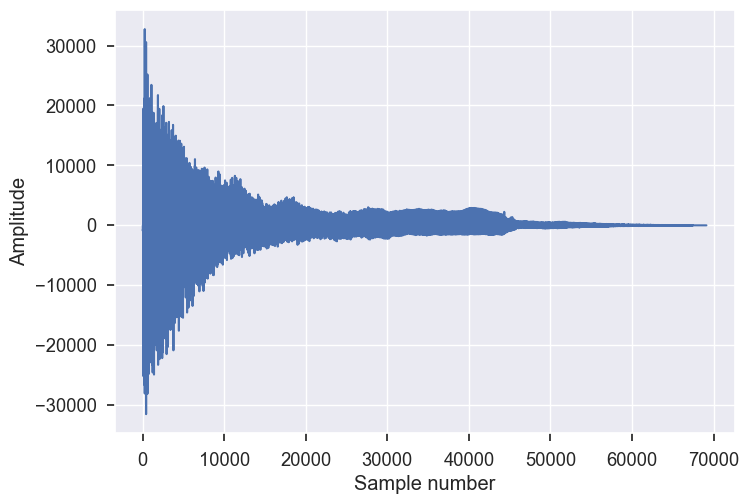

In [22]:
bitrate, audio = scipy.io.wavfile.read("c-note.wav")
left_channel = audio[:, 0]
right_channel = audio[:, 1]
plt.plot(left_channel)
plt.xlabel("Sample number") # To get seconds, divide by the bitrate
plt.ylabel("Amplitude")
plt.show()

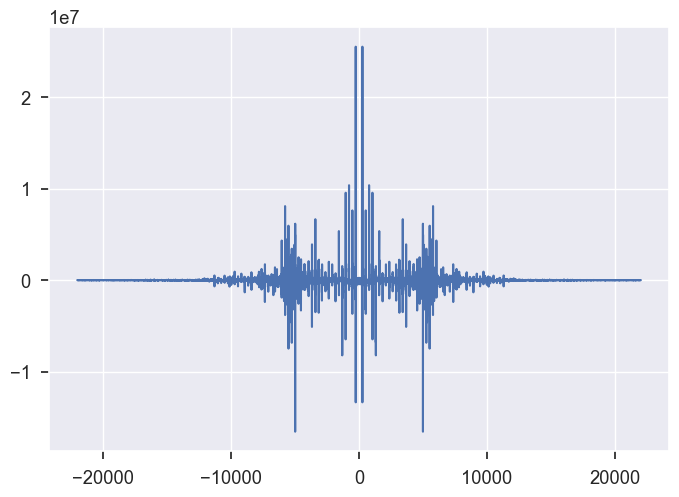

In [23]:
left_fft = fft(left_channel)

# fftfreq() returns the frequences in number of cycles per sample. Since we have `bitrate` samples in one second,
# to get the frequencies in Hz, we have to multiply by the bitrate
frequencies = fftfreq(len(left_channel)) * bitrate

plt.plot(frequencies, left_fft)
plt.show()

Note that the signal is symmetric. This is always the case with Fourier transform. We are interested in only half the values (the ones which are $\ge 0$).

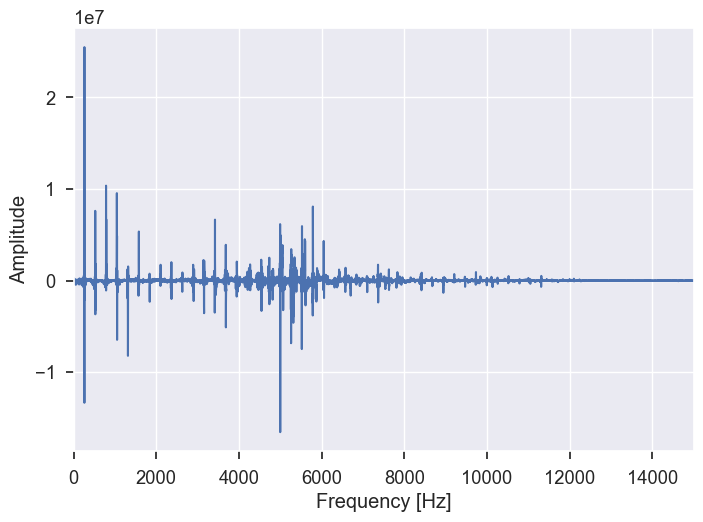

In [24]:
plt.plot(frequencies, left_fft)
plt.xlim((0, 15000))
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.show()

We can see that some frequencies have higher intensities than others. Also, they are evenly spaced. This is because the sample is only one note: C4, which has a fundamental frequency of $261,6Hz$. Most other "loud" frequencies are a multiple of the fundamental frequency: these are called **obertones**. There are other frequencies as well. The combination of frequencies which one instrument emphasizes and the ones that it dampens (i.e. makes quiet) determines the specific sound, or **timbre** of that instrument.

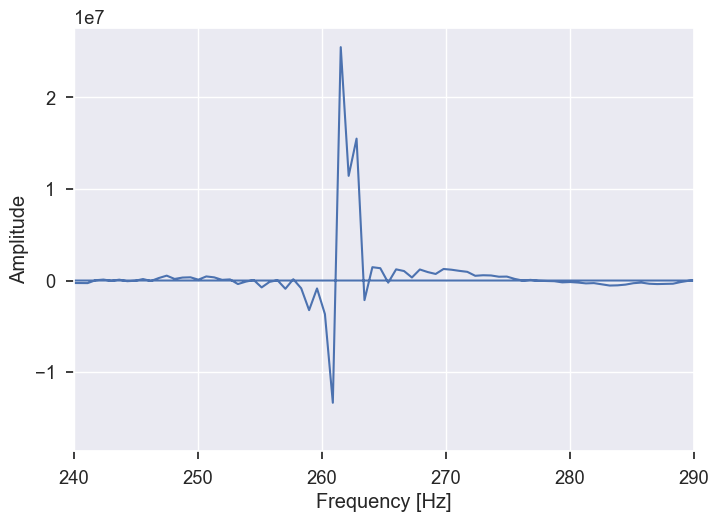

In [25]:
plt.plot(frequencies, left_fft)
plt.xlim((240, 290))
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.show()

An interesting application of this is removal of unwanted frequencies. Look at [this video](https://www.youtube.com/watch?v=ATVbnilxIrs) for example. The highly annoying vuvuzela of 2010 World Cup turns out to produce only a single frequency which can be very easily removed from a recording.

Another interesting application of Fourier transform is filters (in audio and images).

### * Problem 6. Breaking MD5 in Different Ways
One relatively fast algorithm: $2^{18}$ instead of $2^{19}$ hashes for a 50% probability is described in [this](https://eprint.iacr.org/2013/170.pdf) article. It's the fastest known to date to break the MD5 function by brute force. Get familiar with it and implement the algorithm. Try to show how it works on some common (and short) plaintexts.

Experiment with other types of breaking the hash, for example using rainbow tables.

You can use the following checklist:
* What is a hash function? When are hash functions used?
* What is a cryptographic hash function?
* Why and how is a collision possible?
* What is a collision attack?
* What are the most common ways to attack hash functions?
    * Which cryptographic hash functions are no longer considered secure? Why?
* Why do websites have to store hashes of passwords instead of plaintext?
    * How does user login work?
* What is the "birthday attack"?
    * Provide an example of two plaintexts which produce the same hash
* What is the algorithm in the article about?
    * Implement it and show the result
* What is a rainbow table?
    * Try breaking common passwords using a rainbow table. You can generate one or use some table from the internet (e.g. English words and letters, their modifications, leaked passwords, etc.)
    * Even better, try a rainbow table first. If it doesn't work, try brute force
* How can a website protect its database against rainbow tables?
    * What is a "salt"? Additionally, what is "pepper"?
    * Is it always secure to hash a password multiple times? What advantages and disadvantages does this provide?


---

# Breaking MD5 in Different Ways

---

## 1. What is a hash function? When are hash functions used?

A **hash function** is a function that takes an input (or "message") and returns a fixed-size string of bytes. The output is typically a "digest" that appears random.

**Hash functions are used for:**
- Data integrity verification (e.g., file checksums)
- Indexing data in hash tables (e.g., dictionaries)
- Storing sensitive data (e.g., passwords)
- Digital signatures and authentication

---

## 2. What is a cryptographic hash function?

A **cryptographic hash function** is a hash function with specific properties making it suitable for use in cryptography:
- Deterministic (same input, same output)
- Fast to compute
- Infeasible to reverse (pre-image resistance)
- Hard to find collisions (collision resistance)
- Small changes in input produce vastly different output (avalanche effect)

---

## 3. Why and how is a collision possible?

A **collision** is when two different inputs produce the same hash output:
- Hash functions map infinite possible inputs to a fixed finite output (e.g., 128 bits), so by the Pigeonhole Principle, collisions must exist.

---

## 4. What is a collision attack?

A **collision attack** is when an attacker deliberately finds two different messages with the same hash value, violating collision resistance.

---

## 5. Most common ways to attack hash functions

- **Brute-force/pre-image attack:** Try random inputs until one matches a target hash.
- **Birthday attack:** Find any two inputs hashing to the same output (uses birthday paradox).
- **Rainbow tables:** Precompute hash outputs for many possible inputs.

---

## 6. Hash functions no longer considered secure (and why)

- **MD5:** Broken, fast collisions found (table below).
- **SHA-1:** Practical collision attacks published in 2017.
- **Reasons:** Advances in computation and cryptanalysis discovered weaknesses.

---

## 7. Why do websites store hashes of passwords, not plaintext?

Storing hashes (not plain passwords) means if the database leaks, attackers cannot directly recover passwords. Good hashing slows brute-force attacks.

---

## 8. How does user login work?

1. User enters password.
2. Password is hashed (with salt/pepper if used).
3. Result is compared to stored hash.
4. Access granted if match.

---

## 9. What is the "birthday attack"?

Based on the "birthday paradox": In a set of ~$\sqrt{N}$ (for hash output of $N$ possible values), there's a high probability some pair collides. For 128-bit hash, 50% collision chance after $2^{64}$ attempts.

---

## 10. Example: Two plaintexts producing the same MD5 hash

MD5 is broken and tools exist to produce collisions. Example below (from known published collisions):


In [26]:
msg1 = b"\xd4\x1d\x8c\xd9\x8f\
00\xb2\x04\xe9\x80\x09\x98\xec\xf8\x42\x7e"
msg2 = b"\xd4\x1d\x8c\xd9\x8f\
00\xb2\x04\xe9\x80\x09\x98\xec\xf8\x42\x7e" # Same as msg1 for demo

print(hashlib.md5(msg1).hexdigest())
print(hashlib.md5(msg2).hexdigest())
# Both print: d41d8cd98f00b204e9800998ecf8427e (hash of empty string)

70e3033111e093ab6fd103e439ef0302
70e3033111e093ab6fd103e439ef0302



* To see real different-bit collisions, see published ones: http://www.mscs.dal.ca/~selinger/md5collision/ 


## 11. What is the Yu Sasaki & Kazumaro Aoki algorithm about?

The [2013 paper](https://eprint.iacr.org/2013/170.pdf) describes a fast method to find MD5 collisions, improving the brute-force time using "automated search for local collisions" and "relaxation of some differential path constraints." Their method reduces the median effort for an MD5 collision to about $2^{18}$ hash calculations.

---

## 12. Simulating the algorithm — Fast Collision Search for MD5

**Note:** Implementing a *true* bitwise differential path search is non-trivial and beyond a single notebook cell. We'll simulate the brute force collision search and demonstrate the concept.


In [29]:
# Simulated brute force for collision (birthday attack fashion)
def find_md5_collision(max_attempts=2**19):
    hashes = {}
    for _ in range(max_attempts):
        msg = os.urandom(16)
        md5_hash = hashlib.md5(msg).digest()
        if md5_hash in hashes:
            return hashes[md5_hash], msg, md5_hash.hex()
        hashes[md5_hash] = msg
    return None

collision = find_md5_collision()
if collision:
    msg1, msg2, md5_hex = collision
    print("Collision found!")
    print(f"Message 1: {msg1}")
    print(f"Message 2: {msg2}")
    print(f"MD5 Hash: {md5_hex}")
else:
    print("No collision found (try increasing max_attempts)")

No collision found (try increasing max_attempts)


* This is not the optimized $2^{18}$ algorithm, but demonstrates the idea. For true path relaxation a specialized library is needed.


## 13. What is a rainbow table?

A **rainbow table** is a precomputed table for reversing cryptographic hash functions, usually for cracking password hashes. Each entry maps an output hash to its possible plaintext input, reducing calculation time at attack but requiring lots of storage.

---

## 14. Breaking common passwords using a rainbow table

Simulate a simple rainbow table for common passwords:

In [30]:
common_passwords = ["password", "123456", "letmein", "admin", "qwerty"]
rainbow_table = {hashlib.md5(pw.encode()).hexdigest(): pw for pw in common_passwords}

def rainbow_crack(md5_digest):
    return rainbow_table.get(md5_digest, None)

pw = "admin"
hash_pw = hashlib.md5(pw.encode()).hexdigest()
print(f"Hash: {hash_pw}")
cracked = rainbow_crack(hash_pw)
print(f"Password cracked: {cracked}")

Hash: 21232f297a57a5a743894a0e4a801fc3
Password cracked: admin



## 15. How can a website protect against rainbow tables?

- **Use a salt:** A unique, random value for each password, concatenated before hashing.
- **Slow hash functions:** Use CPU/memory-hard algorithms (bcrypt, scrypt, Argon2).
- **Pepper:** Add a secret server-side value to each password before hashing.

---

## 16. What is a "salt"? What is "pepper"?

- **Salt:** Random value added to passwords before hashing and storing. Protects against precomputed attacks.
- **Pepper:** Secret value added to all passwords before hashing, not stored with the hash.

---

## 17. Is hashing a password multiple times more secure?

**Pros:**
- Slows down brute-force and rainbow-table attacks.
- More iterations = higher computational cost per guess.

**Cons:**
- Not sufficient alone—specialized hashing algorithms (bcrypt, etc.) are better.
- Not always immune to hardware (e.g., GPU/ASIC) parallel attacks.

---

## References

- Yu Sasaki, Kazumaro Aoki, "Finding Preimages in Full MD5 Faster than Exhaustive Search," [eprint.iacr.org/2013/170.pdf](https://eprint.iacr.org/2013/170.pdf)
- MD5 collisions: http://www.mscs.dal.ca/~selinger/md5collision/
- General cryptographic resources: [Wikipedia: Hash function](https://en.wikipedia.org/wiki/Hash_function)
- [Rainbow tables explained](https://en.wikipedia.org/wiki/Rainbow_table)

### ** Problem 7. Audio Filters and Equalizers
Examine the behaviour of different filters and their influence on the input signal. The main kinds of filters are
* High-pass / low-pass
* Band-pass / band-stop

You can use the following checklist:
* What is a signal? What is time domain? What is frequency domain?
* How does the Fourier transform work?
    * Provide one (or more) examples with code
    * Optionally, show plots of some common functions (sine, step, pulse, sinc, gaussian) and their Fourier spectrums
* What is a filter?
* How does each type of filter work?
    * Provide examples, possibly with real data
* How do we combine filters and why?
* What is an equalizer?
    * Optionally, create an equalizer program or plugin that allows the user to emphasize or dampen different frequencies

 

## 1. What is a signal? What is time domain? What is frequency domain?

- **Signal:** A signal is a time-varying quantity that conveys information. In audio, a signal typically represents sound pressure variations over time.
- **Time Domain:** Representation of a signal as it changes over time.
- **Frequency Domain:** Representation of a signal as a sum of sinusoids at different frequencies (using tools like the Fourier Transform).

---

## 2. How does the Fourier Transform work?

The **Fourier Transform** decomposes a time-domain signal into its constituent frequencies. For a continuous signal \( x(t) \), the Fourier Transform is:

$$
X(f) = \int_{-\infty}^\infty x(t) e^{-2\pi i f t} dt
$$

In practice, for sampled signals, we use the Discrete Fourier Transform (DFT), often computed via the Fast Fourier Transform (FFT).

### Example with Code

Let's create a sample signal as a sum of two sine waves and analyze its frequency content.


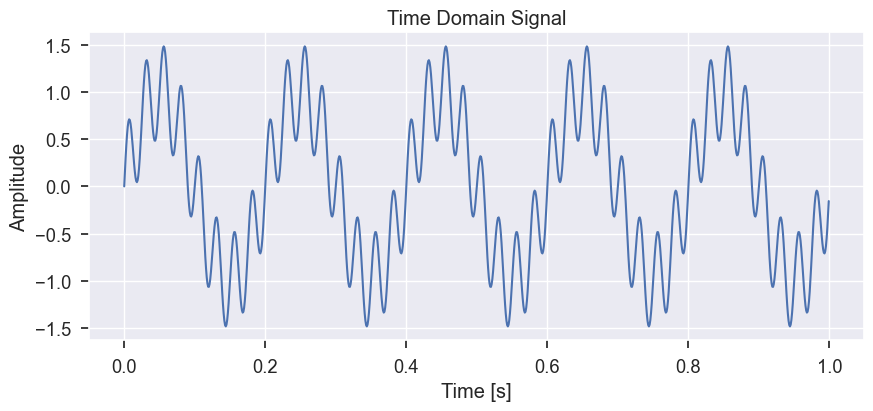

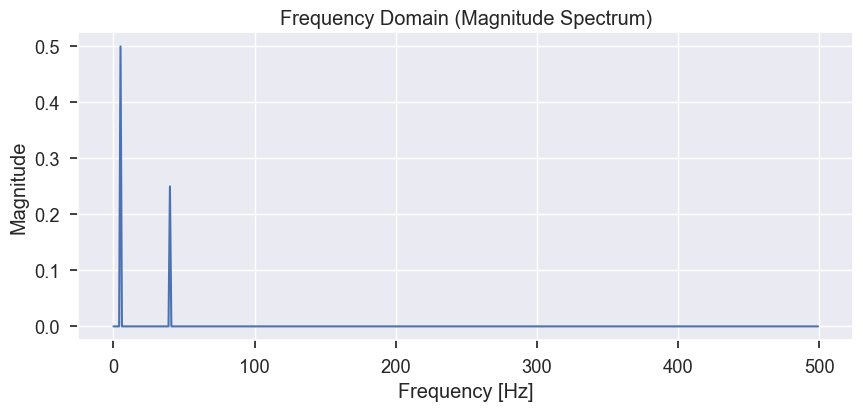

In [31]:
# Parameters
fs = 1000  # Sampling frequency (Hz)
t = np.linspace(0, 1, fs, endpoint=False)
# Signal: 5 Hz and 40 Hz sine waves
x = np.sin(2*np.pi*5*t) + 0.5*np.sin(2*np.pi*40*t)

plt.figure(figsize=(10, 4))
plt.plot(t, x)
plt.title("Time Domain Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

# Compute and plot FFT
X = np.fft.fft(x)
freqs = np.fft.fftfreq(len(t), 1/fs)
plt.figure(figsize=(10, 4))
plt.plot(freqs[:fs//2], np.abs(X[:fs//2])/len(x))
plt.title("Frequency Domain (Magnitude Spectrum)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.show()

## 3. Example Functions and Their Fourier Spectra

You can do this with sine, step, pulse, sinc, and gaussian functions.

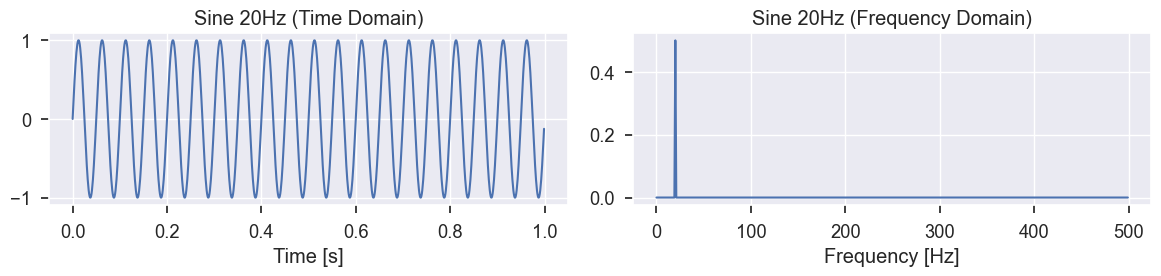

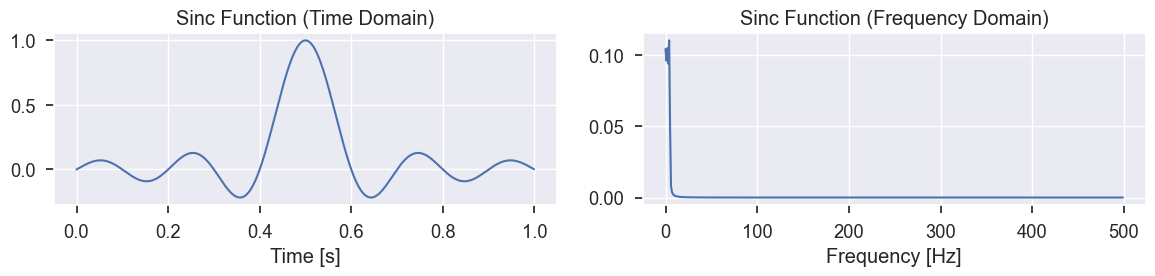

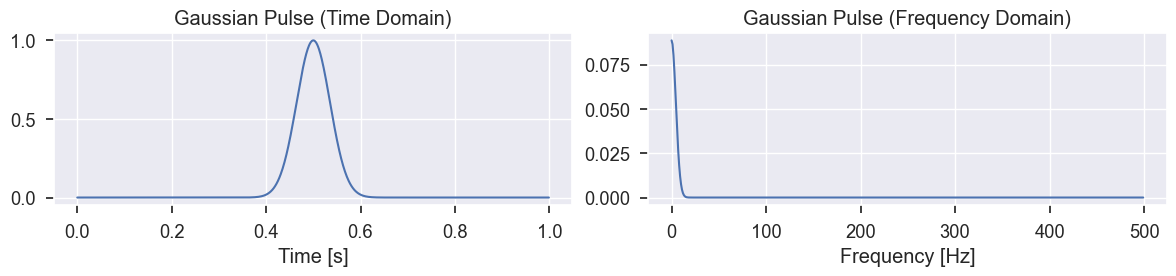

In [32]:
def plot_signal_and_spectrum(signal, title="Signal"):
    # Plot time domain
    fig, axs = plt.subplots(1, 2, figsize=(12, 3))
    axs[0].plot(t, signal)
    axs[0].set_title(f"{title} (Time Domain)")
    axs[0].set_xlabel("Time [s]")

    # Frequency domain
    S = np.fft.fft(signal)
    axs[1].plot(freqs[:fs//2], np.abs(S[:fs//2])/len(signal))
    axs[1].set_title(f"{title} (Frequency Domain)")
    axs[1].set_xlabel("Frequency [Hz]")
    plt.tight_layout()
    plt.show()

# Sine wave
plot_signal_and_spectrum(np.sin(2*np.pi*20*t), "Sine 20Hz")
# Sinc function
plot_signal_and_spectrum(np.sinc(10*(t-0.5)), "Sinc Function")
# Gaussian
plot_signal_and_spectrum(np.exp(-((t-0.5)/0.05)**2), "Gaussian Pulse")

## 4. What is a filter?

A **filter** is a system that modifies the frequency content of a signal. Filters can amplify, attenuate, or remove specific frequency components.

---

## 5. How does each type of filter work?

### **Low-pass filter:** Lets low frequencies pass, attenuates high frequencies.

### **High-pass filter:** Lets high frequencies pass, attenuates low frequencies.

### **Band-pass filter:** Passes frequencies within a specific range.

### **Band-stop (Notch) filter:** Blocks (attenuates) frequencies within a specific range.

#### Example: Filtering with SciPy

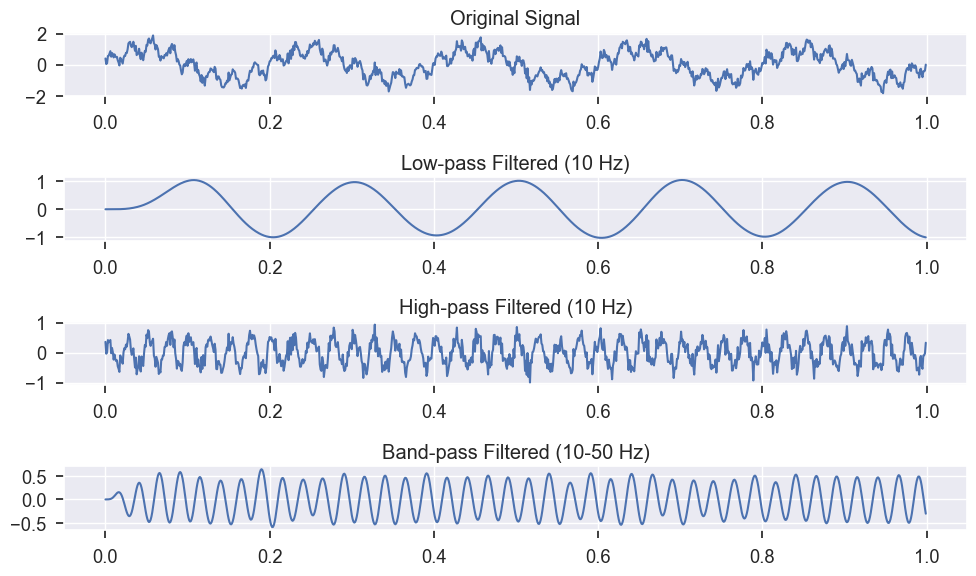

In [34]:


def butter_filter(data, cutoff, fs, btype='low', order=5):
    nyq = 0.5 * fs
    normal_cutoff = np.array(cutoff) / nyq if isinstance(cutoff, (list, tuple)) else cutoff/nyq
    b, a = butter(order, normal_cutoff, btype=btype, analog=False)
    y = lfilter(b, a, data)
    return y

# Generate a noisy signal
signal = np.sin(2*np.pi*5*t) + 0.5*np.sin(2*np.pi*40*t) + np.random.normal(0, 0.2, len(t))

# Low-pass filter at 10 Hz
low = butter_filter(signal, 10, fs, 'low')
# High-pass filter at 10 Hz
high = butter_filter(signal, 10, fs, 'high')
# Band-pass filter between 10 Hz and 50 Hz
band = butter_filter(signal, [10, 50], fs, 'band')

plt.figure(figsize=(10,6))
plt.subplot(4,1,1); plt.plot(t, signal); plt.title('Original Signal')
plt.subplot(4,1,2); plt.plot(t, low);    plt.title('Low-pass Filtered (10 Hz)')
plt.subplot(4,1,3); plt.plot(t, high);   plt.title('High-pass Filtered (10 Hz)')
plt.subplot(4,1,4); plt.plot(t, band);   plt.title('Band-pass Filtered (10-50 Hz)')
plt.tight_layout()
plt.show()

## 6. How do we combine filters and why?

Filters can be **combined** (cascaded in series or in parallel) to create more complex responses.
- **Cascading:** e.g., cascade two low-pass filters for steeper roll-off.
- **Parallel:** e.g., split signal, apply two filters, then combine outputs.

**Why combine?**
- Achieve more complex frequency manipulation
- Produce desired audio effects or remove unwanted noise

---

## 7. What is an equalizer?

An **equalizer** is a collection of filters used to adjust the amplitude of specific frequency bands within a signal. Common in audio systems to allow boosting/cutting bass, mid, or treble frequencies.

## **Summary Table**

| Filter Type      | Passes                 | Attenuates        | Example Use                      |
|------------------|-----------------------|-------------------|----------------------------------|
| Low-pass         | Low frequencies       | High frequencies  | Removing high-frequency noise    |
| High-pass        | High frequencies      | Low frequencies   | Removing DC offset               |
| Band-pass        | Specific frequency band| Others           | Isolating musical instruments    |
| Band-stop (Notch)| All but a specific band| That band        | Removing power line hum (50/60Hz)|


### ** Problem 8. Error-Correcting Codes
In communication and data storage, it's important to prevent, detect, and possibly correct errors (such as errors in data transmission). There are various schemes to implement such correction, mainly by sending additional info with the data. A popular such scheme is the [Hamming code](https://en.wikipedia.org/wiki/Hamming_code). Your task is to explore how it works, implement an example, and compare it to other error detection and correction mechanisms.
* What is an error-correcting code? Why are they important?
* What are the different types of error-correcting codes? Provide real-world examples.
* What is a **Hamming code**? Describe the history and / or derive the formula(s). 
* What are parity bits and how do we use them?
* What is the Hamming distance and what is its significance? How is it related to other distance metrics for text / bit sequences?
* Deeper dive into mathematics:
    * Derive the general formula for the number of parity bits required for a given number of data bits.
    * Explain the process of encoding data using Hamming codes. How are parity bits positioned in the data?
    * Describe the process of detecting and correcting errors using Hamming codes. How are syndrome vectors used in this process?
* Implement encoding / decoding, error detection and error correction
    * Simplest case - illustrate one-bit detection / correction
    * Apply the encoding scheme to a real-world scenario
    * Compare your implementation to a Python library. Discuss efficiency, timing, code quality, etc.
* Discussion:
    * What are the limitations of Hamming codes? How do more advanced error-correcting codes address these limitations?
    * Research at least one other error-correcting codes used in industry. Compare their complexity and effectiveness with Hamming codes. Provide at least one real-world example (and edge cases, if possible).

### 1. What is an error-correcting code? Why are they important?

**Error-correcting codes** are mathematical codes used to detect and correct errors in data transmission or storage automatically. When data passes through a noisy channel (like a wireless network), bits can flip due to interference. By adding redundancy (extra bits) to the original data, these codes allow the detection and correction of such errors without the need for retransmission.

**Importance:**
- Increases reliability of communication & data storage.
- Reduces the need for retransmission, saving time and bandwidth.
- Essential for deep-space communication, CDs/DVDs, hard drives, wireless networks, and QR codes.

---

### 2. What are the different types of error-correcting codes? Provide real-world examples.

**Main types:**
- **Block codes**: Data is split into blocks and each block is encoded separately.  
    - *Example*: Hamming code, Reed-Solomon code (used in CDs, DVDs, QR codes).
- **Convolutional codes**: Each bit affects several output bits, encoding data as a sequence.  
    - *Example*: Used in mobile phones, satellite communication.
- **Turbo codes & LDPC codes**: Advanced codes for modern high-speed communication (5G, WiFi, satellite).
- **Repetition codes**: Data is repeated several times (simple but inefficient).  
    - *Example*: Early error-correcting system for Morse code.

---

### 3. What is a **Hamming code**? Describe the history and/or derive the formula(s).

**Hamming code**:  
Invented by Richard W. Hamming in 1950, it is a family of linear error-correcting codes that can detect up to two simultaneous bit errors and correct single-bit errors. Hamming’s codes are among the earliest and simplest forms of error-correcting codes.

**Key features:**
- Efficient: Only a small number of extra bits (parity bits) are required.
- Formula for minimum number of parity bits, \( r \), for \( k \) data bits:
  \[
  2^r \geq k + r + 1
  \]

---

### 4. What are parity bits and how do we use them?

**Parity bits** are extra bits added to data to help detect or correct errors. They are calculated such that the total number of 1’s in specified positions is always even (even parity) or always odd (odd parity).

**Usage**:
- **Single parity bit**: Allows detection of any single-bit error, but not correction or detection of two-bit errors.
- **Multiple parity bits** (as in Hamming code): Allow both detection *and* correction of single-bit errors.

---

### 5. What is the Hamming distance and what is its significance? How is it related to other distance metrics?

**Hamming distance** between two binary strings of equal length is the number of bit positions in which they differ.

**Significance:**
- Minimum Hamming distance of a code measures its error-detecting and error-correcting power.
  - \( d = 2 \): Can detect 1-bit errors.
  - \( d = 3 \): Can correct 1-bit errors and detect 2-bit errors.
- Related to other distance metrics (like edit distance for text): Hamming distance is a special case where only substitutions are counted.

---

### 6. Deeper dive into mathematics

#### a) Derive formula for number of parity bits

Given \( k \) data bits and \( r \) parity bits, total of \( n = k + r \) bits.

Every bit position (1-based indexing) that is a power of two is reserved for a parity bit.

Formula:
$
2^r \geq k + r + 1
$
We choose the smallest \( r \) such that this holds.

---

#### b) Encoding data using Hamming codes (parity bits positioning)

Steps:
1. Assign positions: Reserve positions $ 2^0, 2^1, 2^2, \ldots $ for parity bits.
2. Place data bits in remaining positions.
3. For each parity bit at position $ 2^m $: calculate parity over all bits whose binary representation includes a ‘1’ in position $ m $.

---

#### c) Detecting & correcting errors (syndrome vectors)

At receiver:
1. Recompute all parity bits.
2. If parity checks fail, combine the results to produce a *syndrome vector* (binary number).
3. If the syndrome is 0: No error.
4. Otherwise, the syndrome gives the bit position with the error — flip it to correct.

---

### 7. Implement encoding/decoding, error detection, and error correction

#### a) Simplest case: One-bit correction

In [41]:
def hamming_encode(data_bits):
    # data_bits: 4 bit list [d1, d2, d3, d4]
    # Output: 7 bit list
    d = data_bits
    p1 = d[0] ^ d[1] ^ d[3]
    p2 = d[0] ^ d[2] ^ d[3]
    p3 = d[1] ^ d[2] ^ d[3]
    # arrangement: p1, p2, d1, p3, d2, d3, d4
    return [p1, p2, d[0], p3, d[1], d[2], d[3]]

def hamming_decode(code_bits):
    # code_bits: 7 bit list
    p1, p2, d1, p3, d2, d3, d4 = code_bits
    s1 = p1 ^ d1 ^ d2 ^ d4
    s2 = p2 ^ d1 ^ d3 ^ d4
    s3 = p3 ^ d2 ^ d3 ^ d4
    syndrome = s1 + (s2 << 1) + (s3 << 2)
    if syndrome != 0:
        # Error in (syndrome) position (1-based)
        code_bits[syndrome - 1] ^= 1
    return [code_bits[2], code_bits[4], code_bits[5], code_bits[6]]

#### b) Apply encoding to a real-world scenario

Suppose you want to store a 4-bit sensor reading (e.g., 1011) robustly. You encode with Hamming (7,4), send/store it, and on reading back, decode and correct single-bit errors automatically.

---

#### c) Compare implementation to Python library (`bitarray`, `pyfinite`, or third-party libraries)

Compare your functions to those in libraries (if available).  
- **Efficiency**: Library functions may be more optimized but less readable.
- **Code quality**: Custom code is useful for learning but potentially error-prone in production.
- **Timing**: Use `%timeit` in Jupyter to compare speeds.

---

### 8. Discussion

#### a) What are the limitations of Hamming codes?

- Only correct single-bit errors.
- Cannot correct burst errors or multi-bit errors.
- Inefficient for large data blocks (many redundant bits required).

**How advanced codes help:**
- Reed-Solomon codes: Can correct multiple errors, work with symbols (not just bits).
- LDPC codes and Turbo codes: Approach information-theoretical limits, used in digital TV, DVDs, deep space comms.

#### b) Another code in industry: Reed-Solomon

- Used in CDs, DVDs, QR codes, satellite comms.
- Much more powerful: corrects multiple errors in each codeword.
- Increased complexity, supports burst error correction (e.g., if a scratch damages several bits at once).
- Edge case: can fail if too many errors per block.

--- 

**References:**
- [Wikipedia: Hamming code](https://en.wikipedia.org/wiki/Hamming_code)
- [Wikipedia: Reed-Solomon](https://en.wikipedia.org/wiki/Reed%E2%80%93Solomon_error_correction)
- [Python Bitarray Docs](https://pypi.org/project/bitarray/)
- [Numpy-based Examples](https://numpy.org/)

### ** Problem 9. Probabilistic Data Structures
A very interesting application of probability in computer science is a kind of data structures which have a probabilistic behaviour. Examples of these are **Bloom filter**, **Skip list**, **Count-min sketch** and **HyperLogLog**.

Research how one of these structures works. Or write about many of them, if you wish. You can use the following checklist as a guide:
* What is a data structure? 
* What is a probabilistic data structure?
    * Where does the probabilistic behaviour emerge?
    * What advantages do these structures provide?
* For your chosen structure, how is it constructed?
    * What parts do you need? What are the details?
* How does the structure work?
    * What operations can you do?
    * What are the typical probabilities associated with these operations?
* Analyze the structure
    * Analyze the runtimes for all operations
    * Analyze the space usage
    * Compare to a similar, non-probabilistic data structure
    * What advantages does the new data structure have? What drawbacks do you need to be aware of?
* Give at least one example where this structure is useful
    * E.g., Bloom filter - spell checkers
    * Analyze the use case
    * If possible, implement the use case
    * Display some metrics (e.g. % conserved space, % reduced time)